In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import sklearn
from sklearn import linear_model
import statsmodels.api as sm
from matplotlib import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
df = pd.read_csv('Life Expectancy Data.csv')

In [2]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', 'BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [3]:
df.columns = ["Country","Year","Status","Life Expectancy","Adult Mortality","Infant Deaths","Alcohol","Percentage Expenditure","Hep B","Measles","BMI","Under-Five Deaths","Polio",
              "Total Expenditure","Diphtheria","HIV/AIDS","GDP","Population","Thinness 1-19","Thinness 5-9","Income Composition of Resources","Schooling"]

In [4]:
df.dtypes

Country                             object
Year                                 int64
Status                              object
Life Expectancy                    float64
Adult Mortality                    float64
Infant Deaths                        int64
Alcohol                            float64
Percentage Expenditure             float64
Hep B                              float64
Measles                              int64
BMI                                float64
Under-Five Deaths                    int64
Polio                              float64
Total Expenditure                  float64
Diphtheria                         float64
HIV/AIDS                           float64
GDP                                float64
Population                         float64
Thinness 1-19                      float64
Thinness 5-9                       float64
Income Composition of Resources    float64
Schooling                          float64
dtype: object

In [5]:
df.describe()

Year  Life Expectancy  Adult Mortality  Infant Deaths  \
count  2938.000000      2928.000000      2928.000000    2938.000000   
mean   2007.518720        69.224932       164.796448      30.303948   
std       4.613841         9.523867       124.292079     117.926501   
min    2000.000000        36.300000         1.000000       0.000000   
25%    2004.000000        63.100000        74.000000       0.000000   
50%    2008.000000        72.100000       144.000000       3.000000   
75%    2012.000000        75.700000       228.000000      22.000000   
max    2015.000000        89.000000       723.000000    1800.000000   

           Alcohol  Percentage Expenditure        Hep B        Measles  \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

               BMI  Under-Five Deaths        Polio  Total Expenditure  \
count  2904.000000        2938.000000  2919.000000         2712.00000   
mean     38.321247          42.035739    82.550188            5.93819   
std      20.044034         160.445548    23.428046            2.49832   
min       1.000000           0.000000     3.000000            0.37000   
25%      19.300000           0.000000    78.000000            4.26000   
50%      43.500000           4.000000    93.000000            5.75500   
75%      56.200000          28.000000    97.000000            7.49250   
max      87.300000        2500.000000    99.000000           17.60000   

        Diphtheria     HIV/AIDS            GDP    Population  Thinness 1-19  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03    2904.000000   
mean     82.324084     1.742103    7483.158469  1.275338e+07       4.839704   
std      23.716912     5.077785   14270.169342  6.101210e+07       4.420195   
min       2.000000     0.100000       1.681350  3.400000e+01       0.100000   
25%      78.000000     0.100000     463.935626  1.957932e+05       1.600000   
50%      93.000000     0.100000    1766.947595  1.386542e+06       3.300000   
75%      97.000000     0.800000    5910.806335  7.420359e+06       7.200000   
max      99.000000    50.600000  119172.741800  1.293859e+09      27.700000   

       Thinness 5-9  Income Composition of Resources    Schooling  
count   2904.000000                      2771.000000  2775.000000  
mean       4.870317                         0.627551    11.992793  
std        4.508882                         0.210904     3.358920  
min        0.100000                         0.000000     0.000000  
25%        1.500000                         0.493000    10.100000  
50%        3.300000                         0.677000    12.300000  
75%        7.200000                         0.779000    14.300000  
max       28.600000                         0.948000    20.700000

DATA CLEANING

In [6]:
total = df.isnull(). sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull(). count()).sort_values(ascending=False)
missing_data = pd. concat([total, percent], axis=1, keys=['Total','Percent'])
missing_data.head(15)

Total   Percent
Population                         652  0.221920
Hep B                              553  0.188223
GDP                                448  0.152485
Total Expenditure                  226  0.076923
Alcohol                            194  0.066031
Income Composition of Resources    167  0.056841
Schooling                          163  0.055480
Thinness 5-9                        34  0.011572
Thinness 1-19                       34  0.011572
BMI                                 34  0.011572
Polio                               19  0.006467
Diphtheria                          19  0.006467
Life Expectancy                     10  0.003404
Adult Mortality                     10  0.003404
HIV/AIDS                             0  0.000000

In [7]:
#dropping columns
df.drop('Population', inplace=True, axis=1)
df.drop('Hep B', inplace=True, axis=1)
df.drop('Income Composition of Resources', inplace=True, axis=1)
df.drop('Total Expenditure', inplace=True, axis=1)

In [8]:
#dropping rows
df = df.drop(df.loc[df['GDP'].isnull()].index)
df = df.drop(df.loc[df['Alcohol'].isnull()].index)
df = df.drop(df.loc[df['Schooling'].isnull()].index)
df = df.drop(df.loc[df['Thinness 5-9'].isnull()].index)
df = df.drop(df.loc[df['Thinness 1-19'].isnull()].index)
df = df.drop(df.loc[df['BMI'].isnull()].index)
df = df.drop(df.loc[df['Polio'].isnull()].index)
df = df.drop(df.loc[df['Diphtheria'].isnull()].index)
df = df.drop(df.loc[df['Life Expectancy'].isnull()].index)
df = df.drop(df.loc[df['Adult Mortality'].isnull()].index)

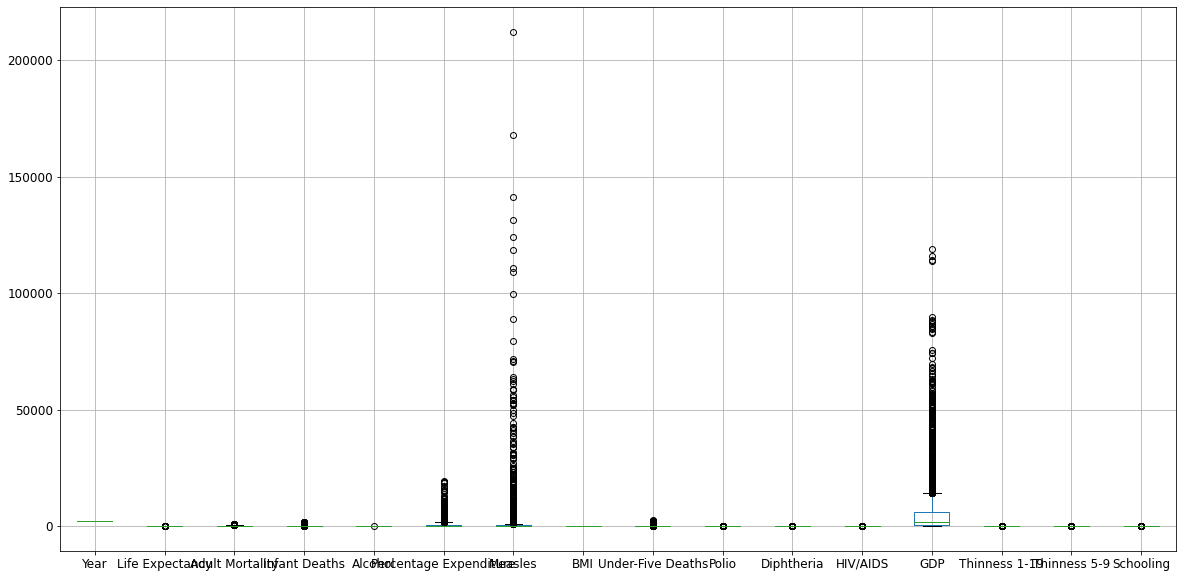

In [9]:
#boxplaot to spot outliers
boxplot = df.boxplot(figsize = (20,10), fontsize = "12", grid="False")
#the outliers within the population column is india, but this data is not misinformation.

FEATURE SELECTION

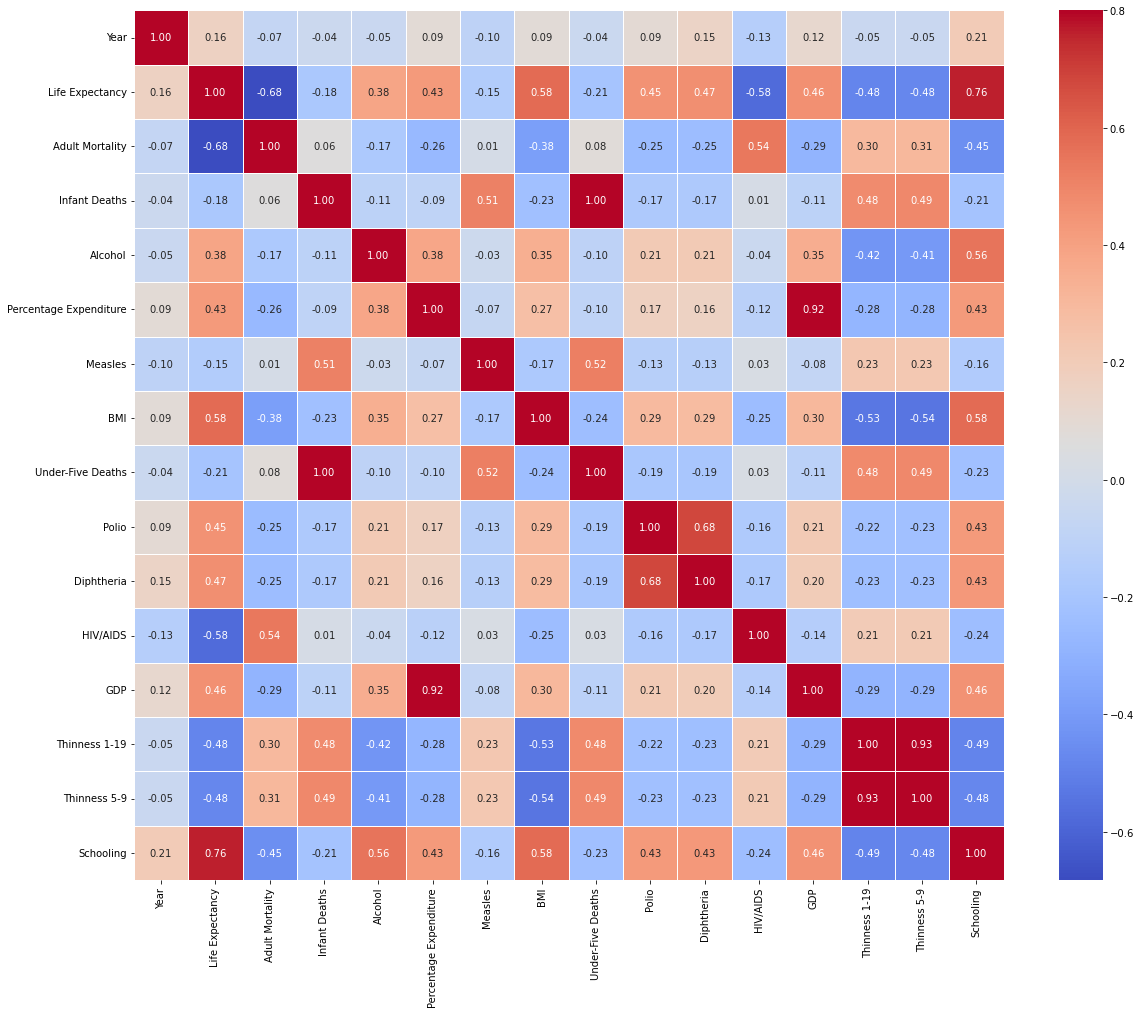

In [10]:
corrmatrix = df.corr()
f, ax = plt.subplots(figsize=(20, 16))
sns.heatmap(corrmatrix,fmt=".2f", annot = True,linewidth = 0.5, vmax=.8, square=True, cmap = "coolwarm");

Based on the above corralation matrix, I will plot linear regression for life expectancy

MODEL DEVELOPMENT AND EVALUATION

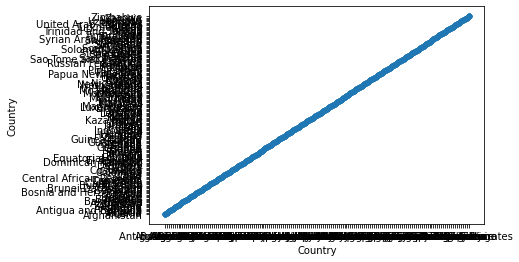

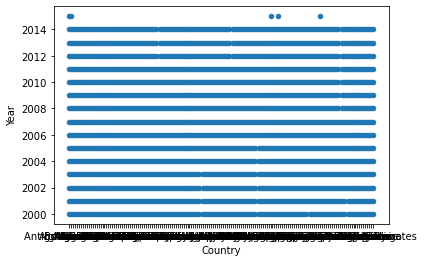

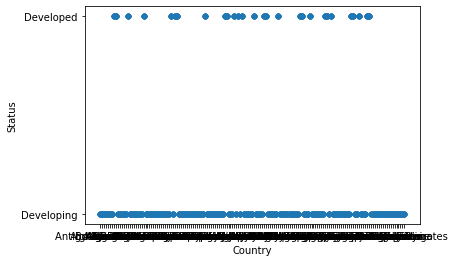

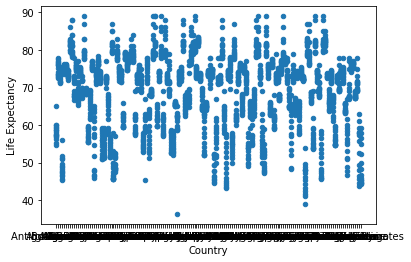

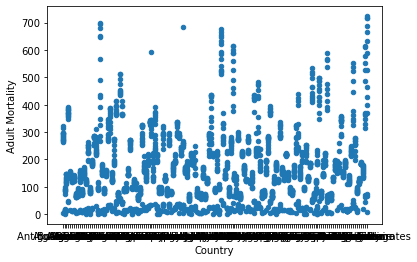

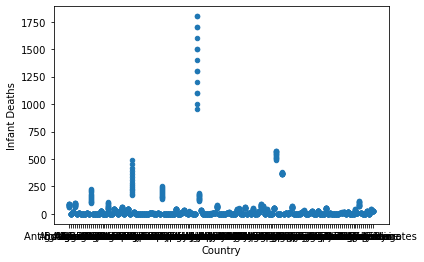

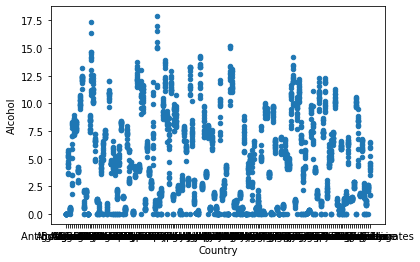

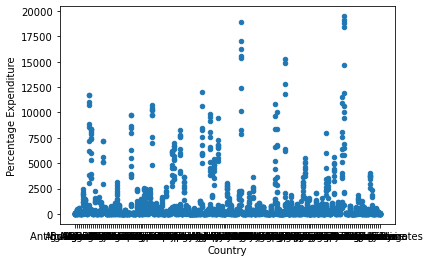

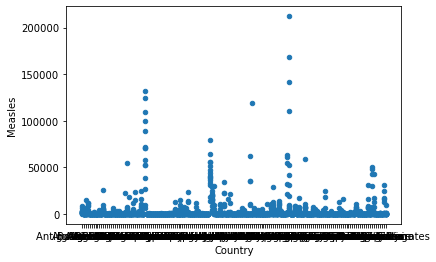

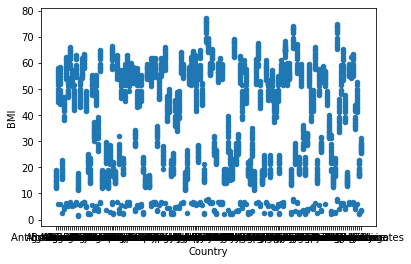

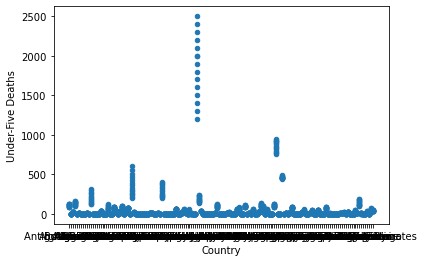

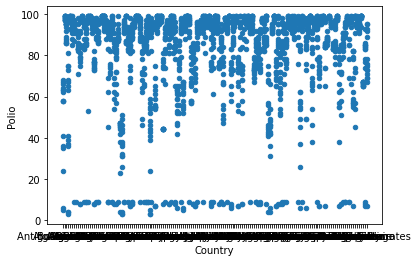

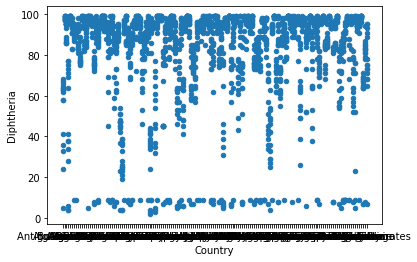

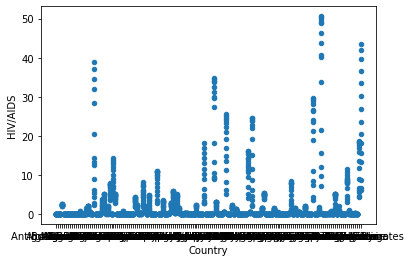

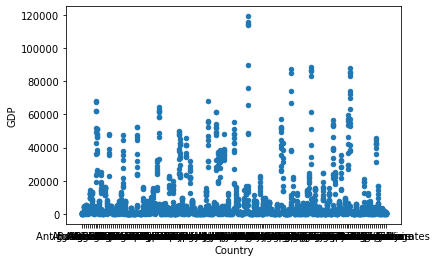

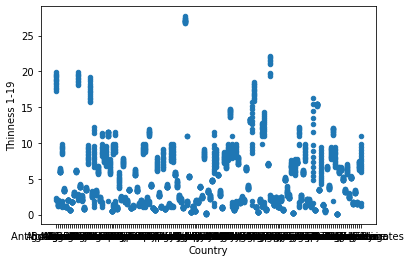

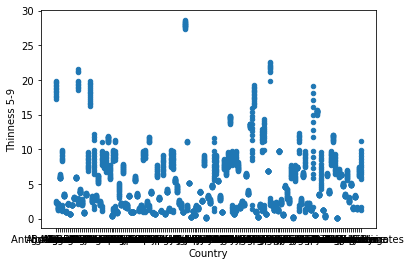

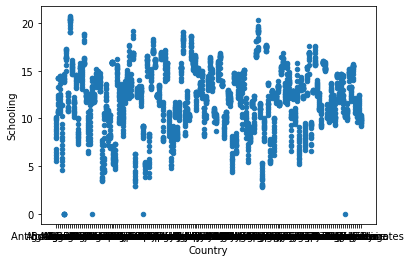

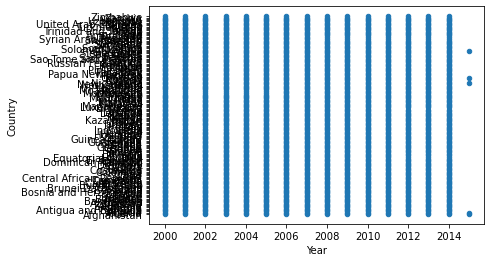

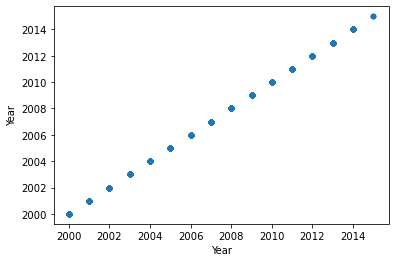

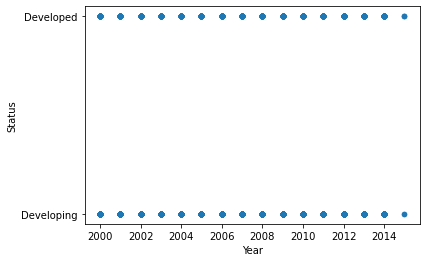

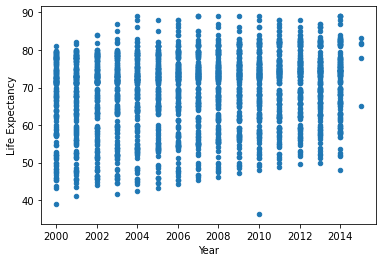

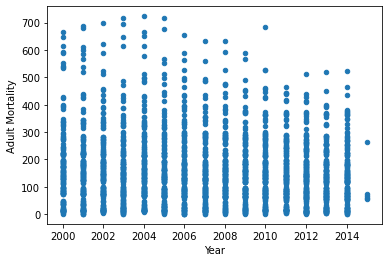

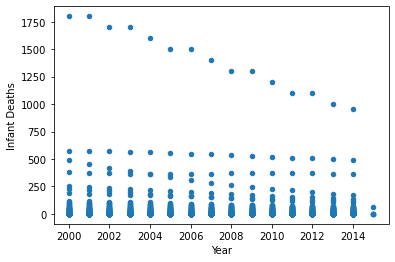

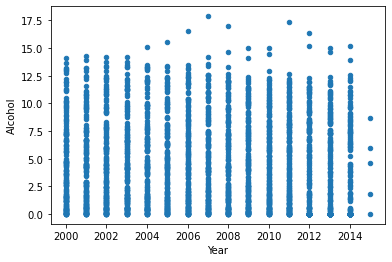

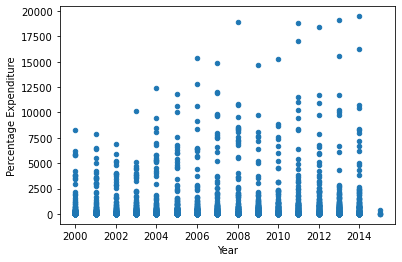

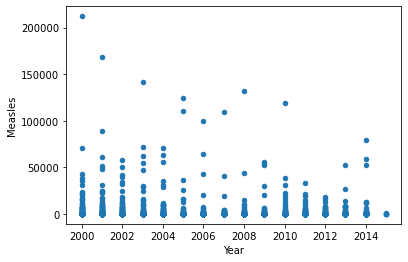

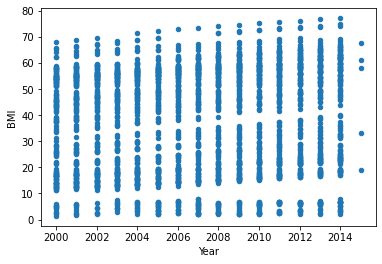

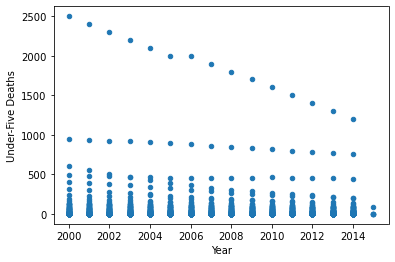

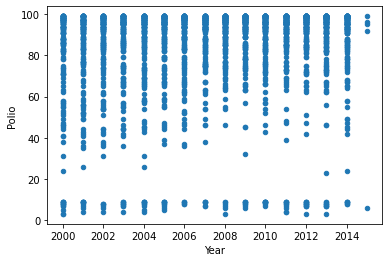

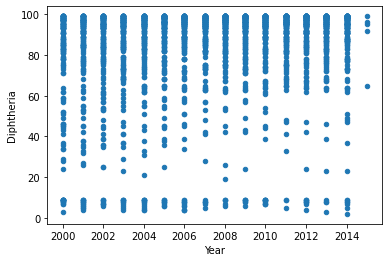

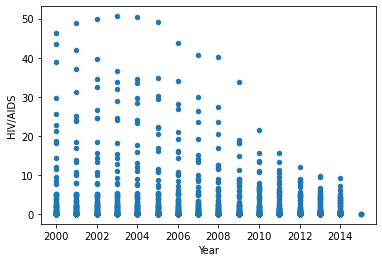

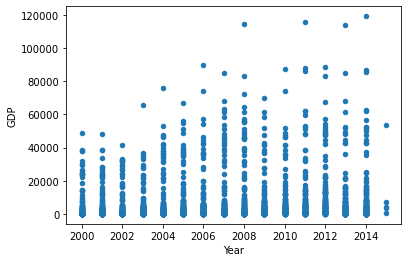

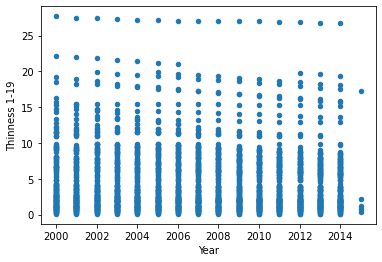

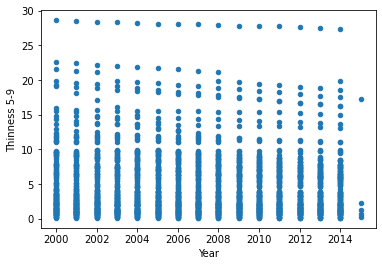

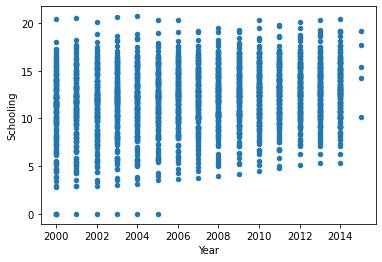

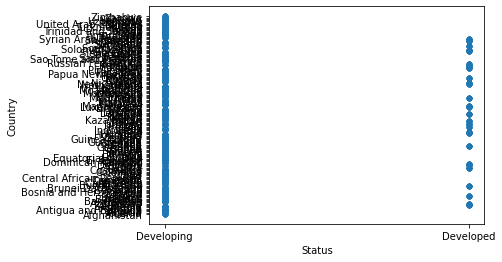

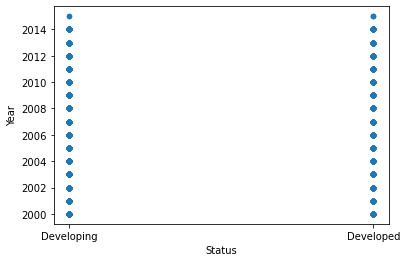

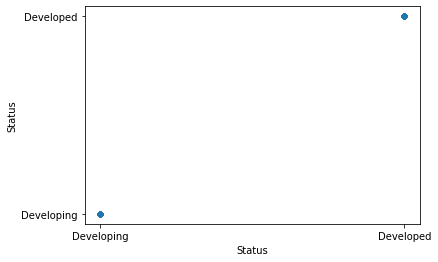

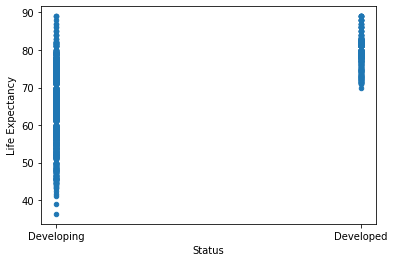

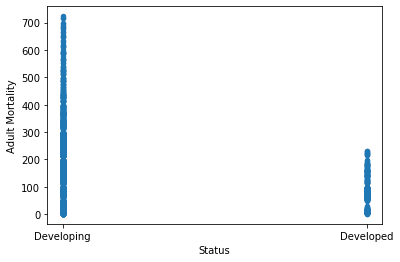

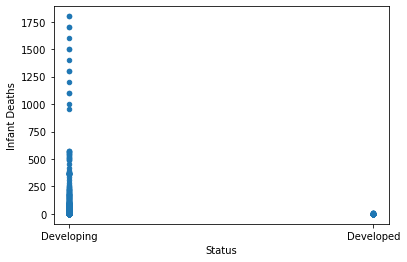

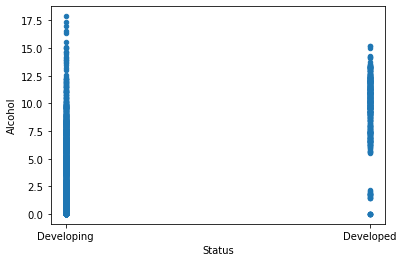

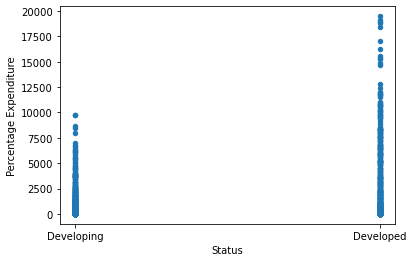

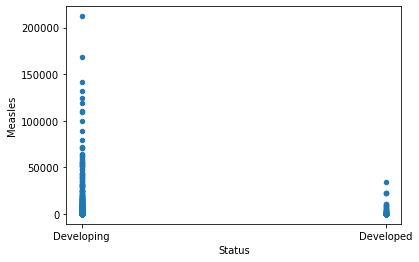

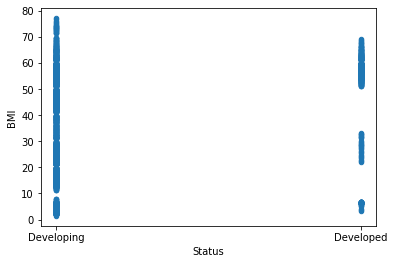

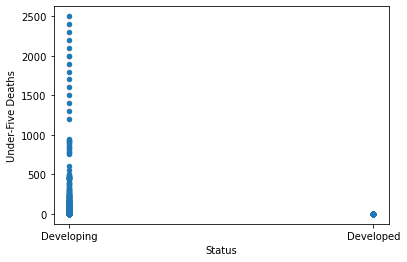

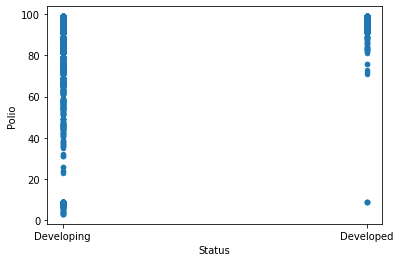

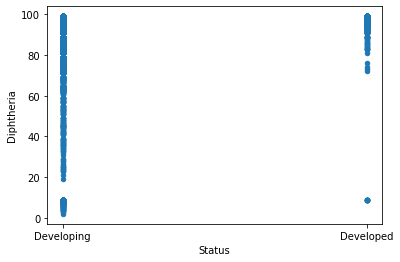

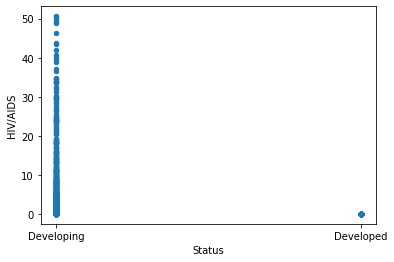

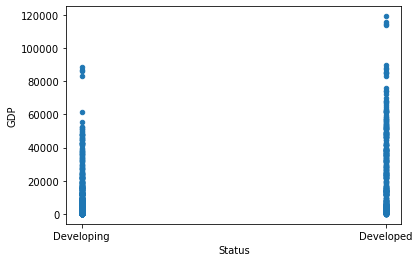

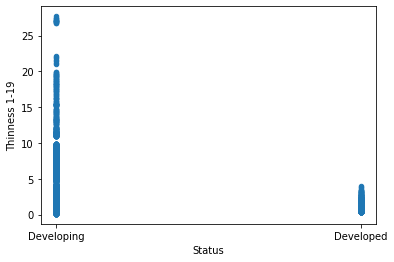

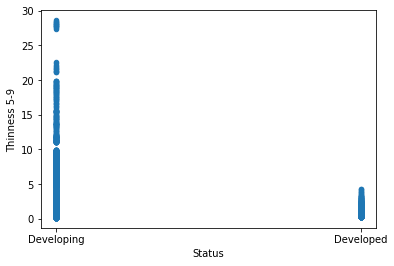

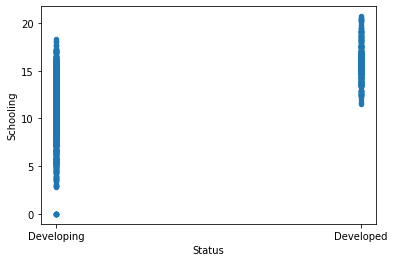

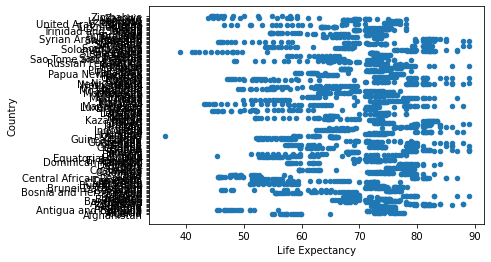

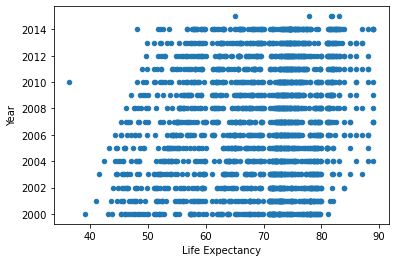

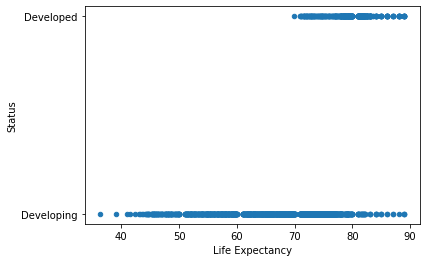

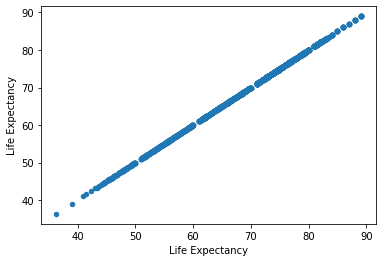

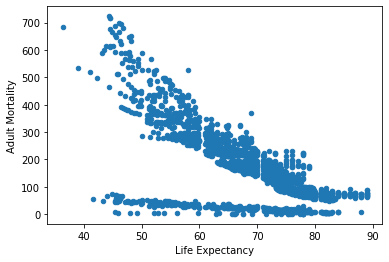

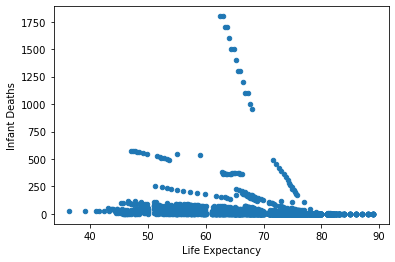

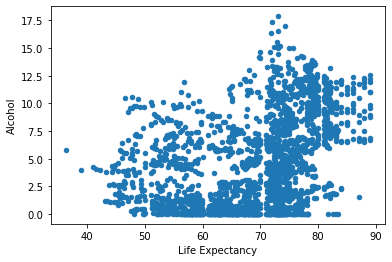

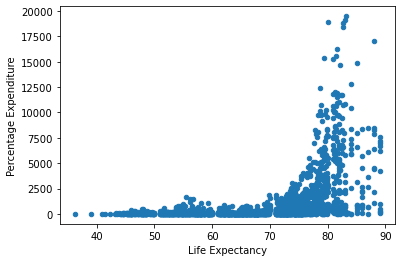

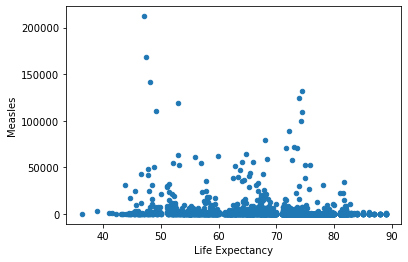

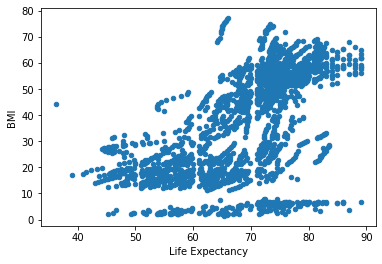

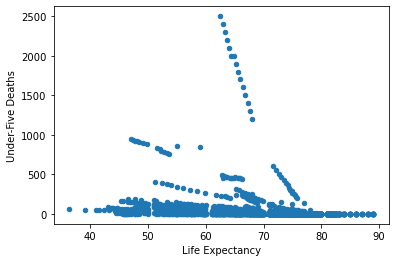

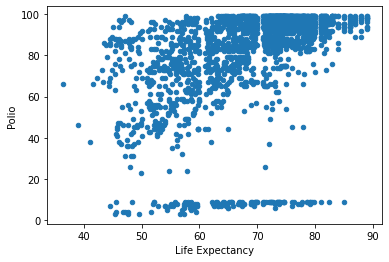

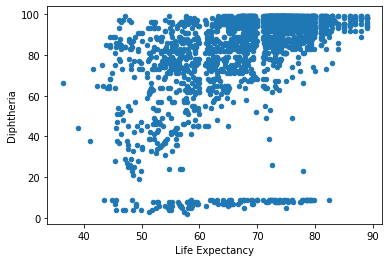

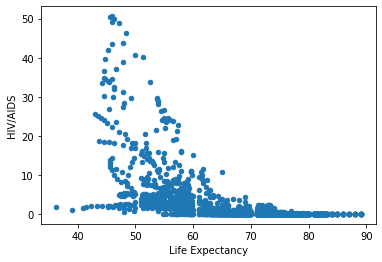

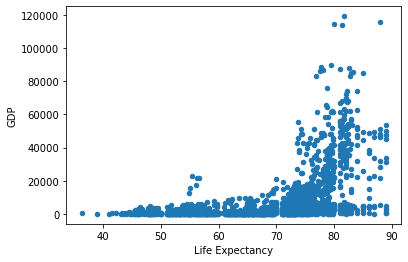

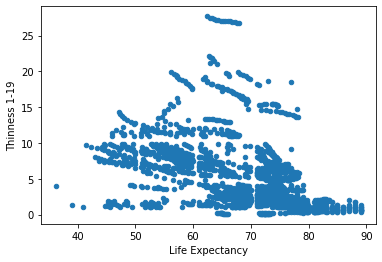

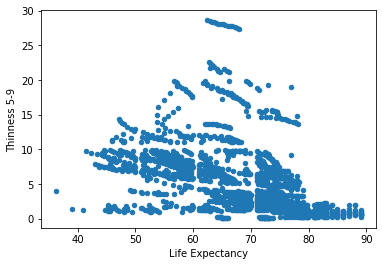

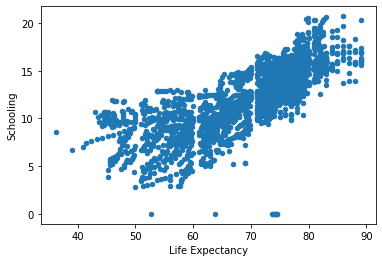

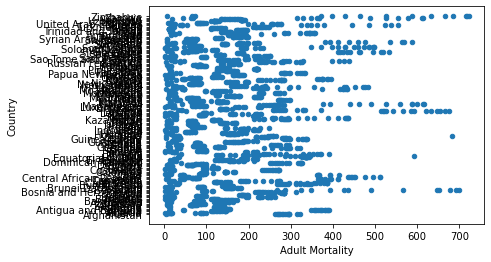

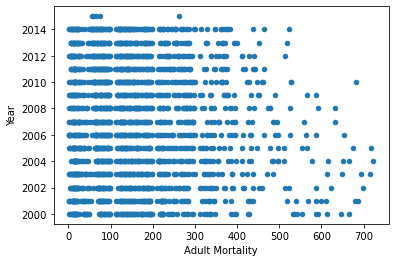

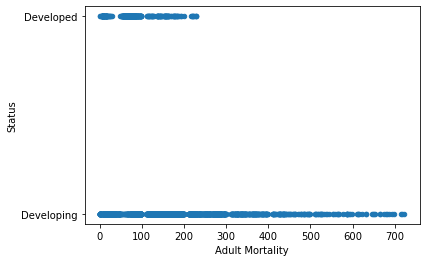

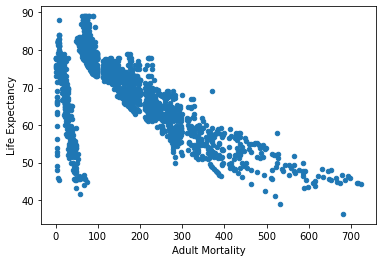

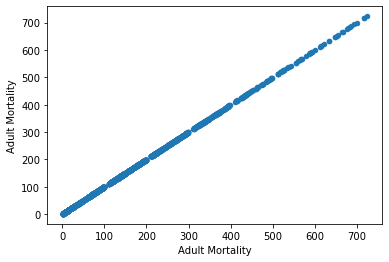

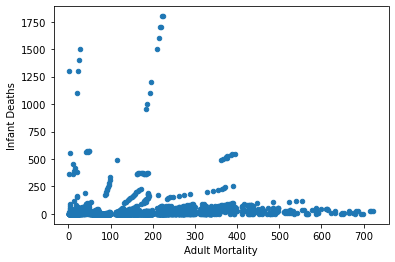

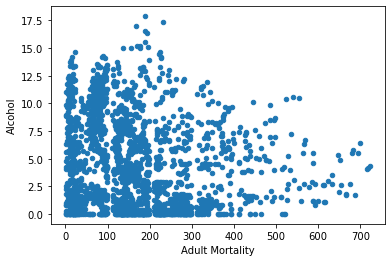

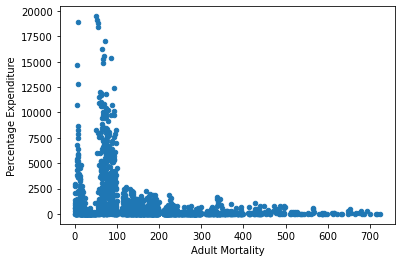

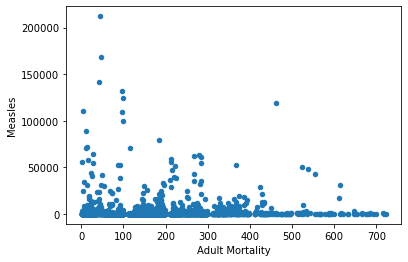

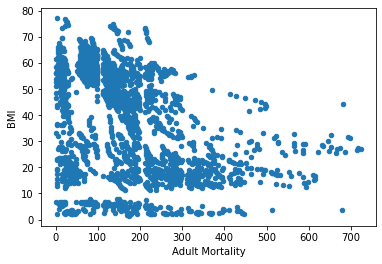

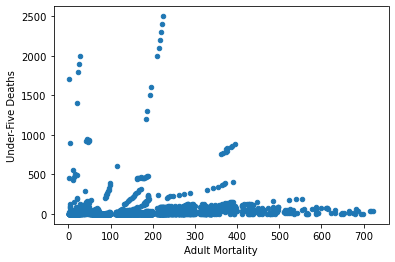

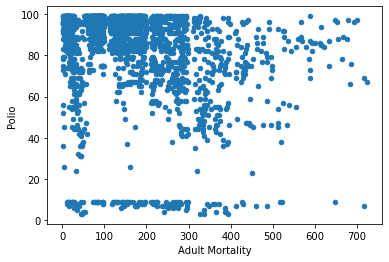

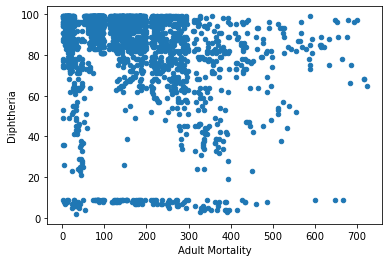

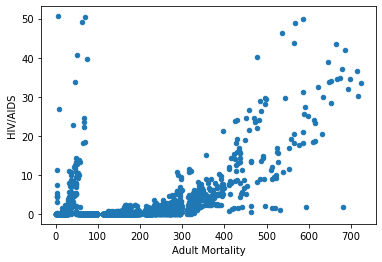

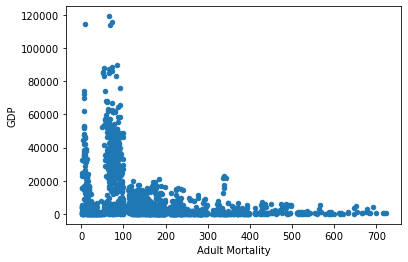

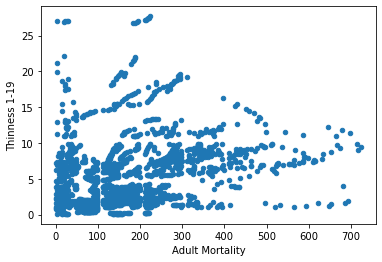

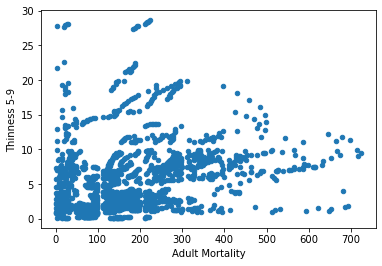

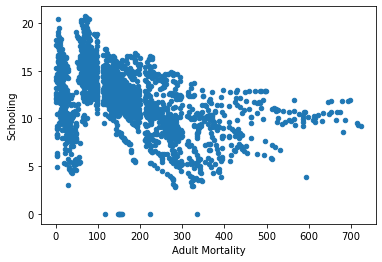

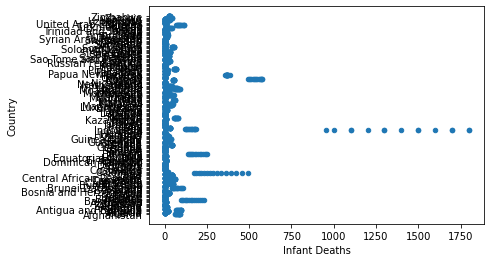

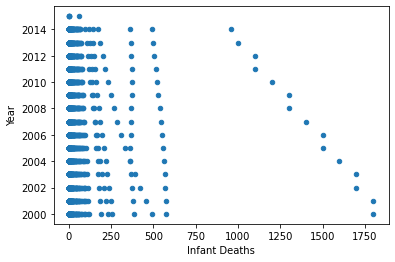

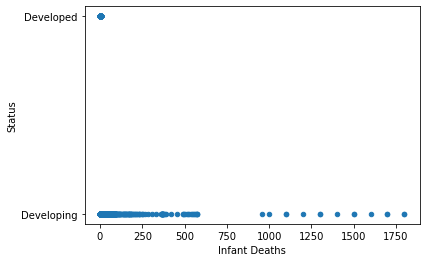

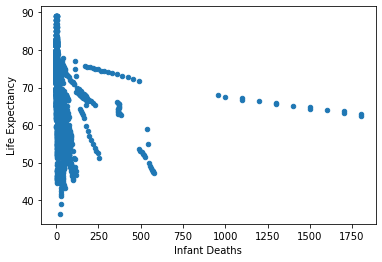

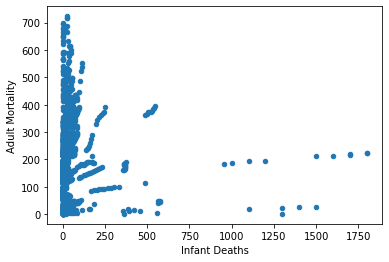

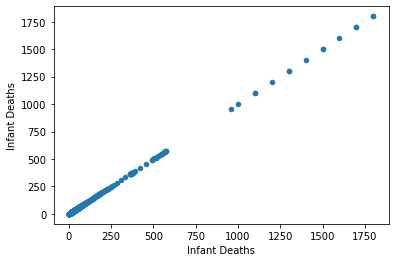

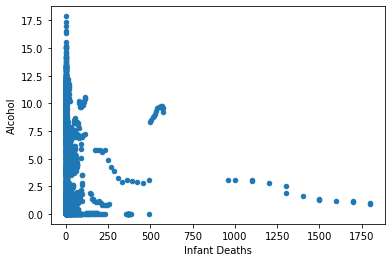

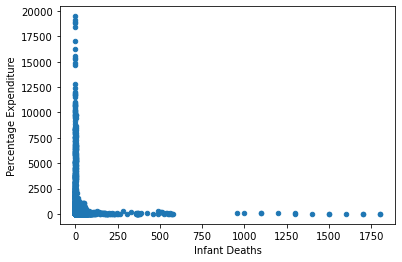

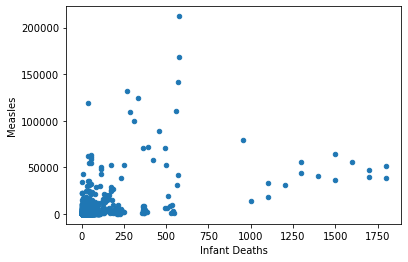

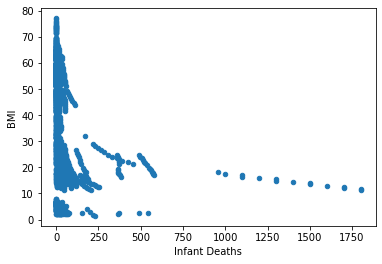

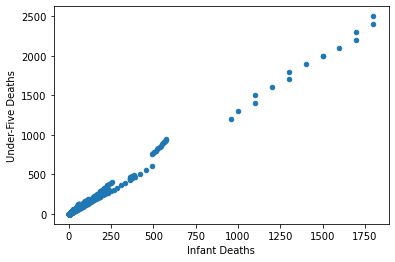

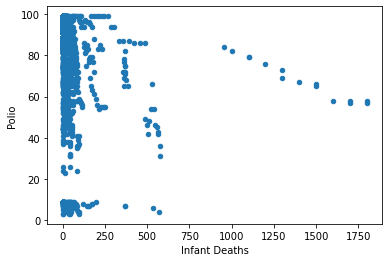

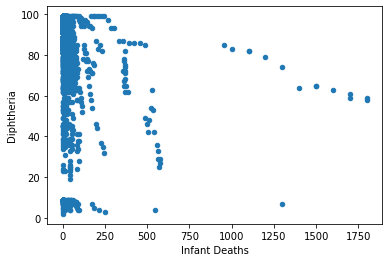

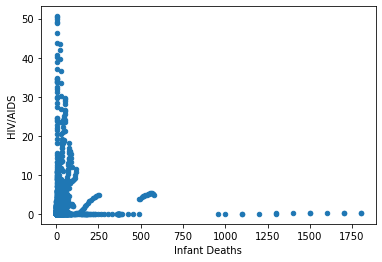

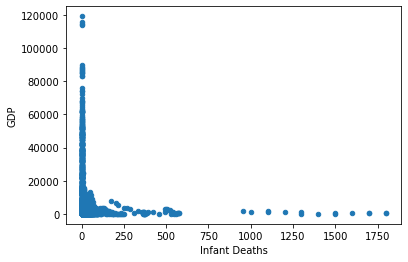

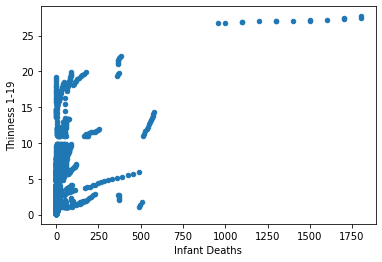

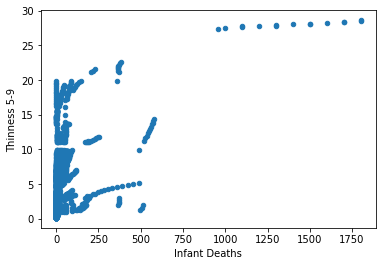

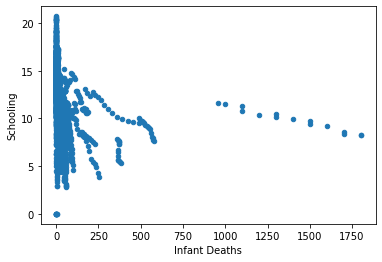

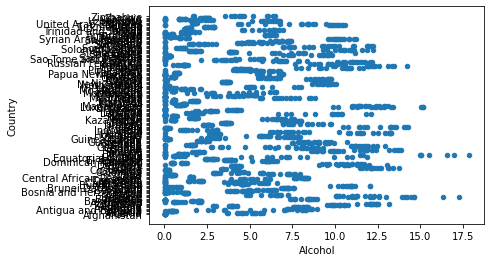

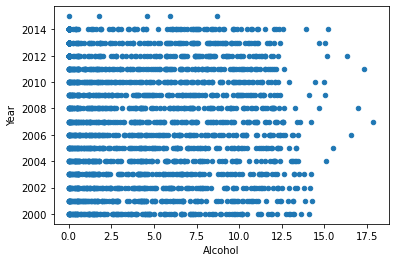

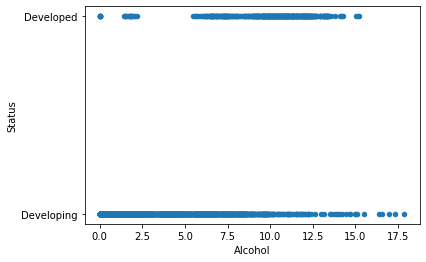

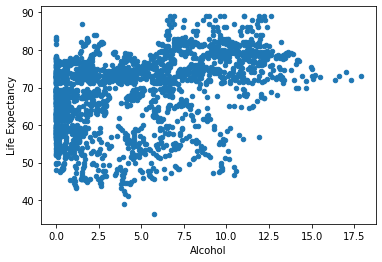

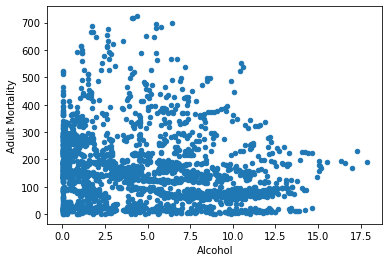

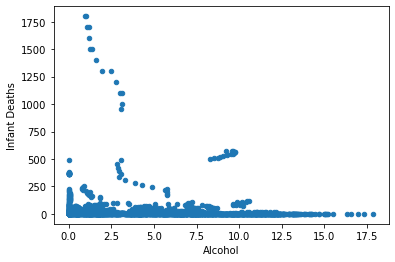

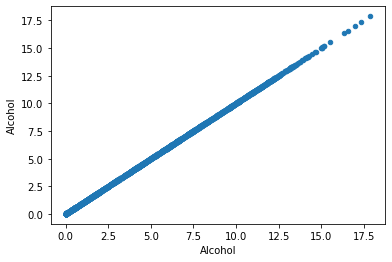

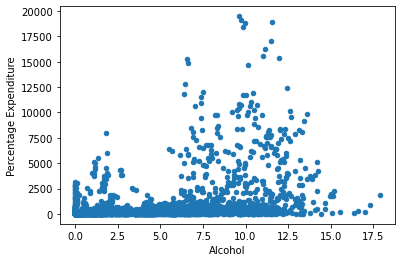

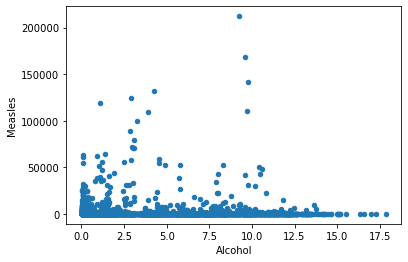

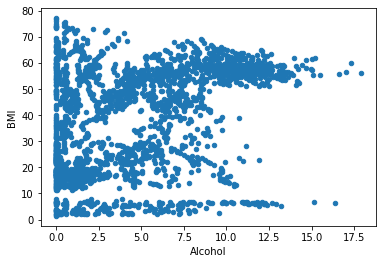

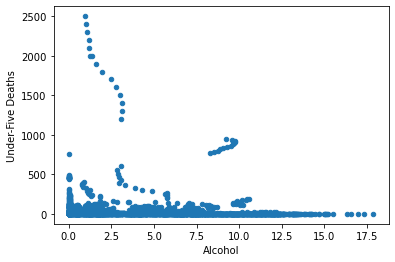

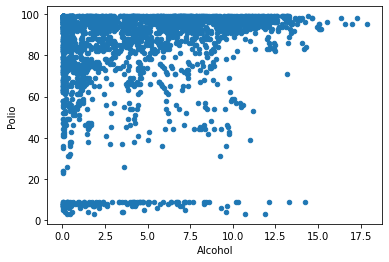

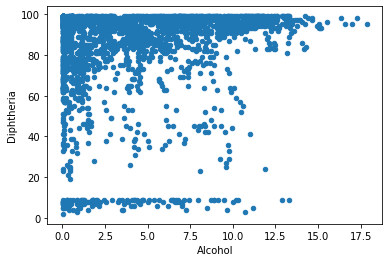

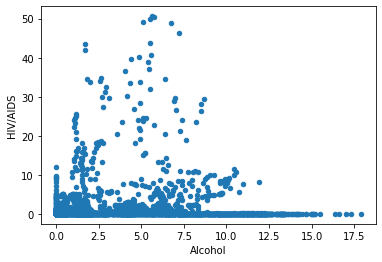

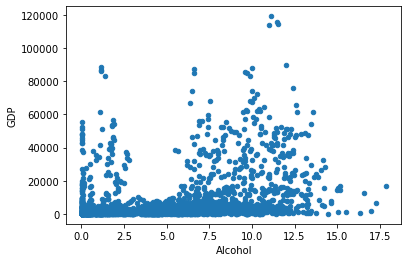

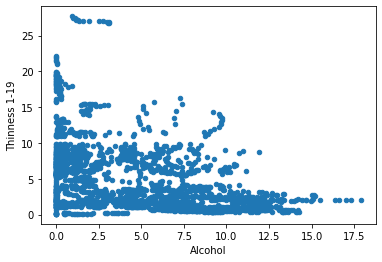

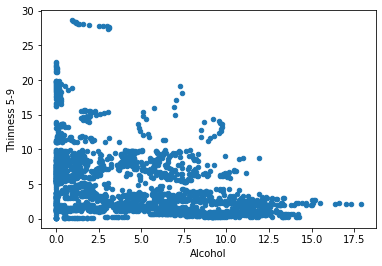

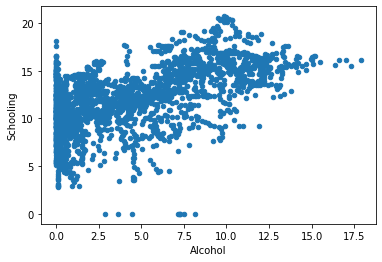

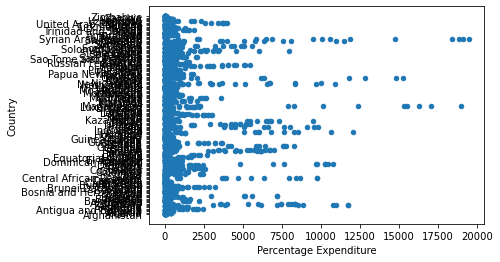

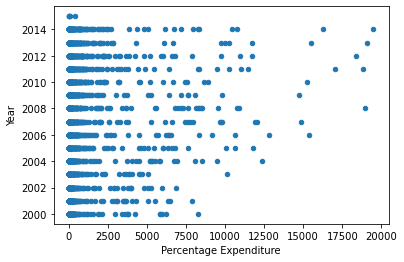

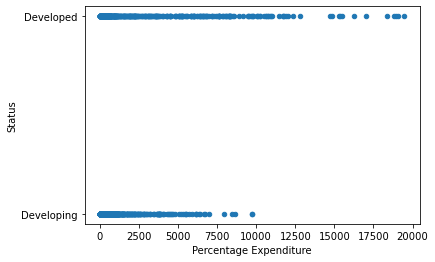

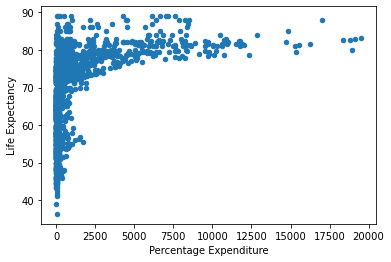

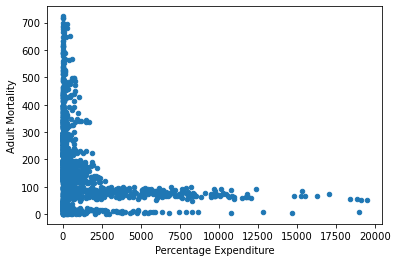

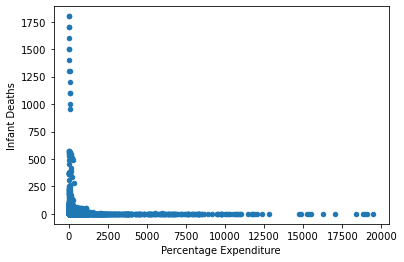

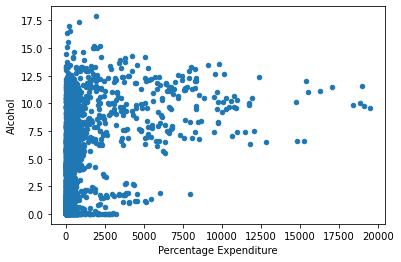

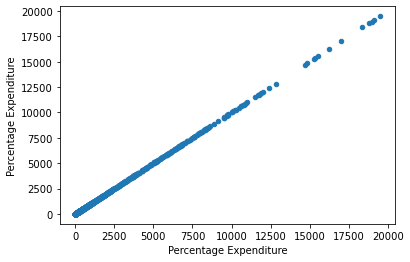

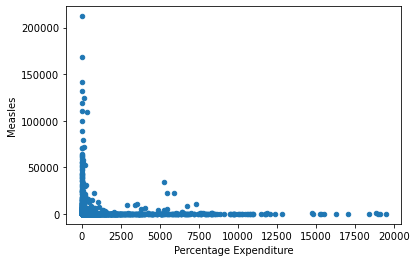

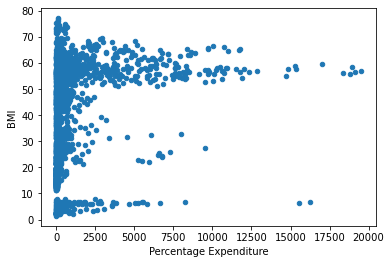

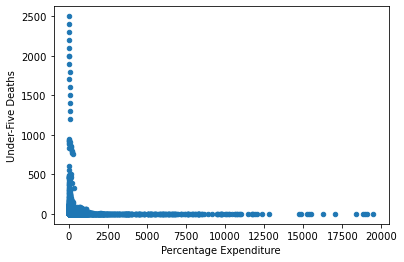

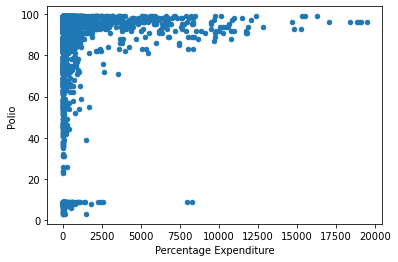

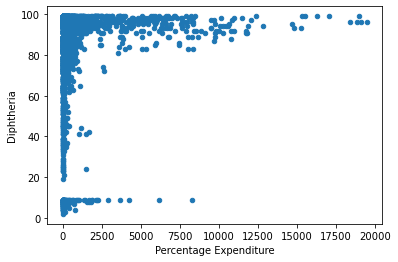

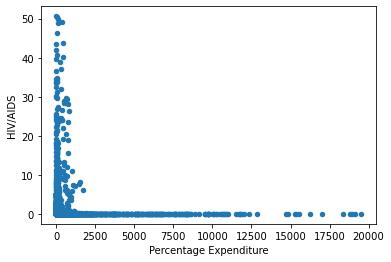

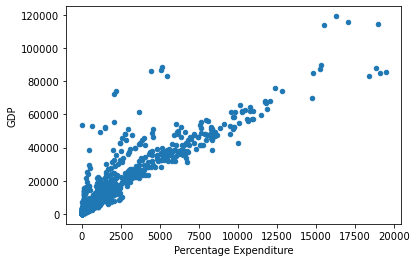

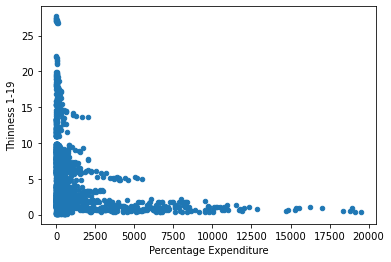

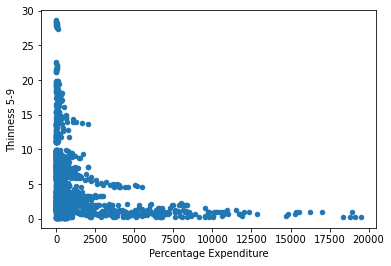

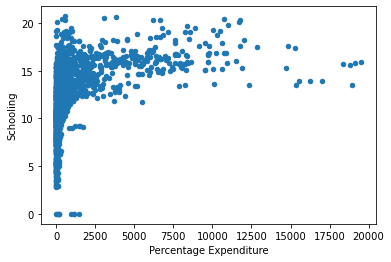

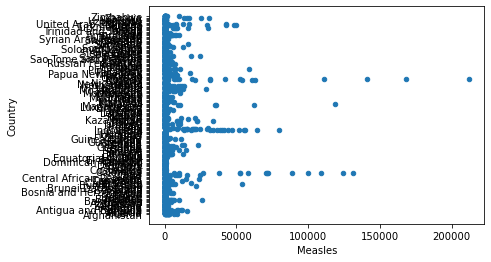

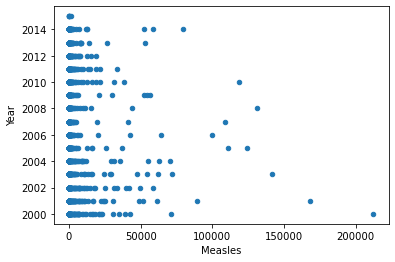

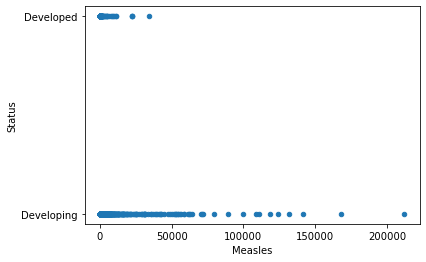

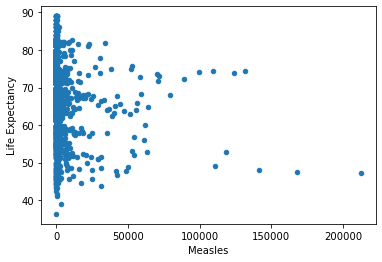

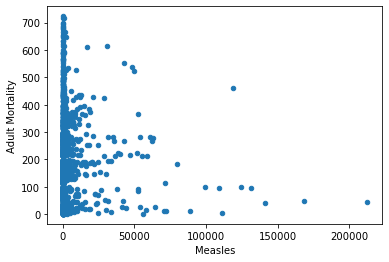

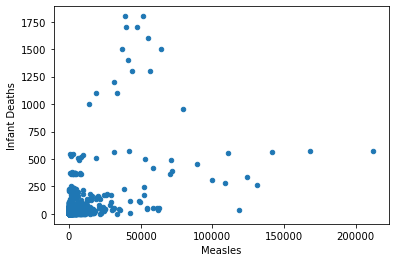

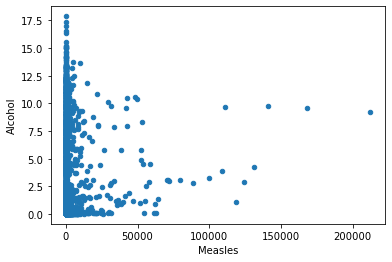

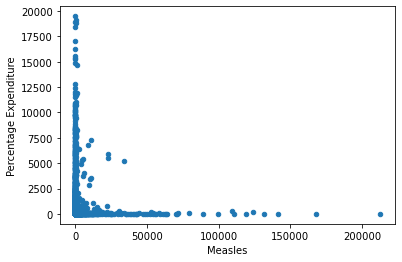

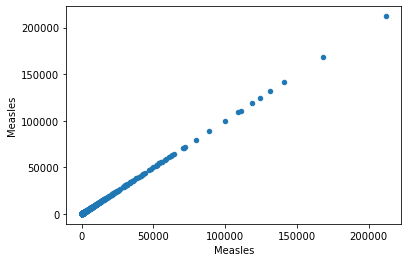

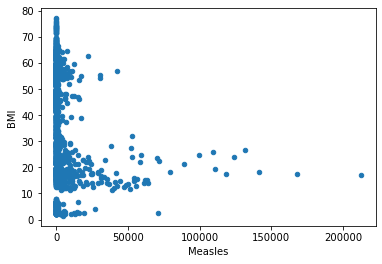

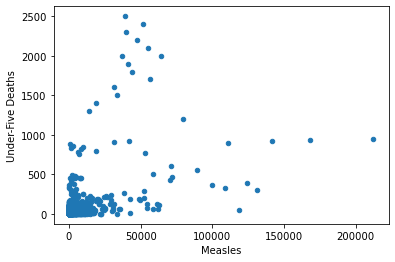

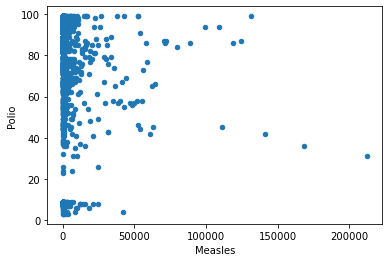

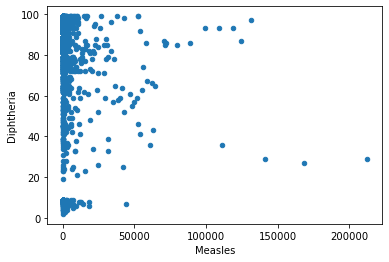

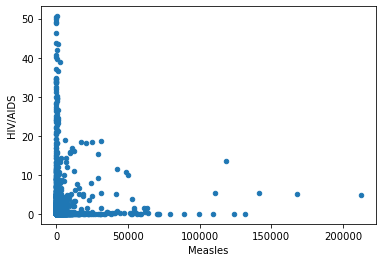

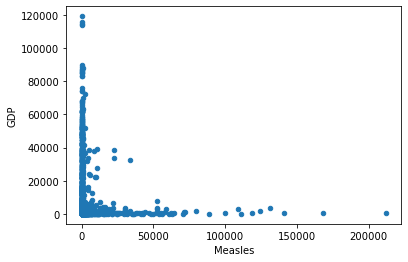

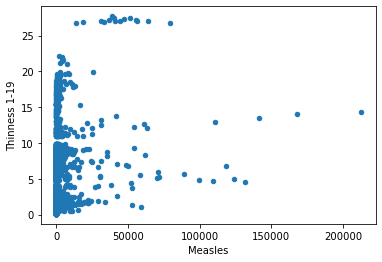

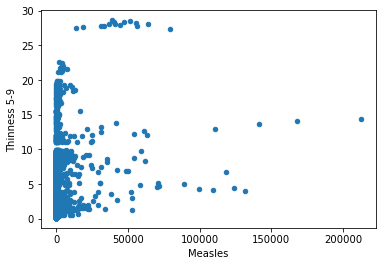

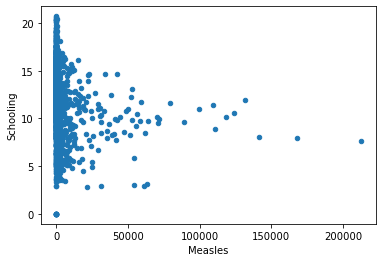

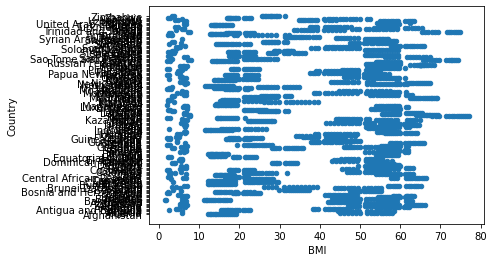

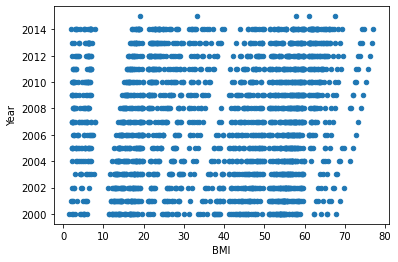

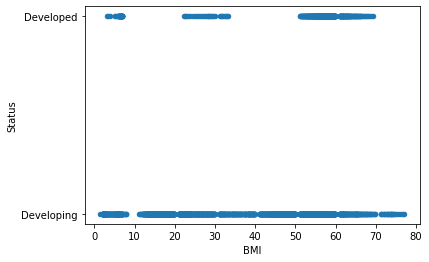

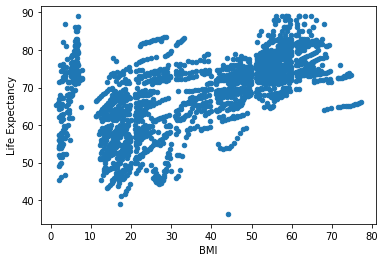

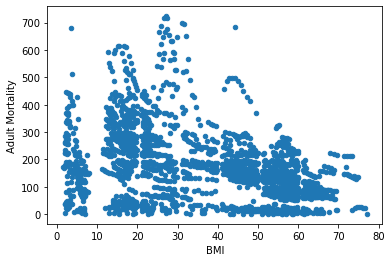

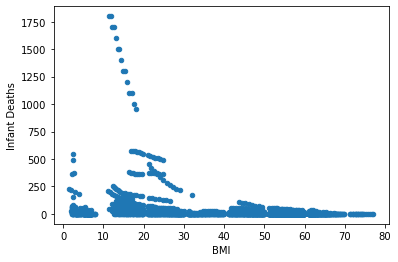

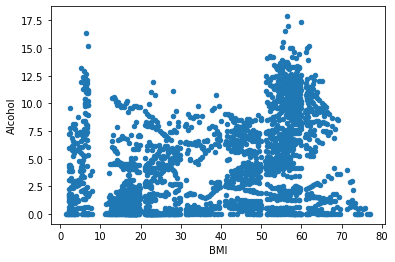

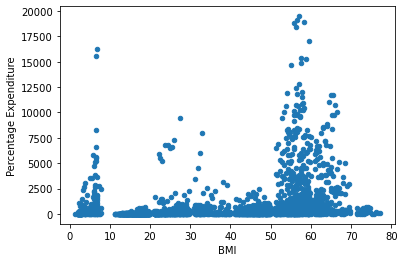

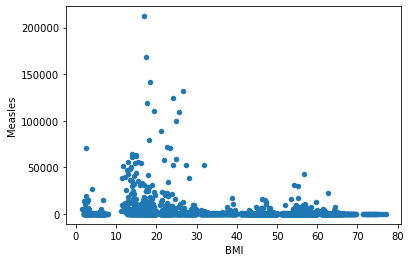

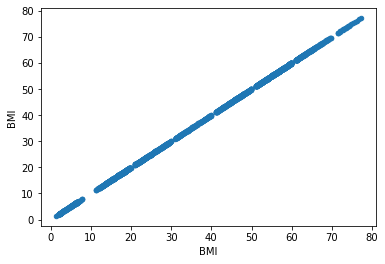

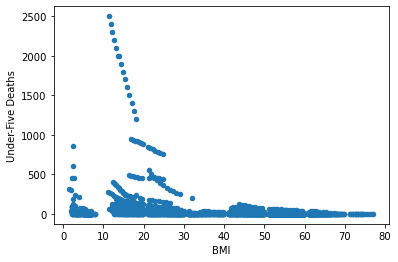

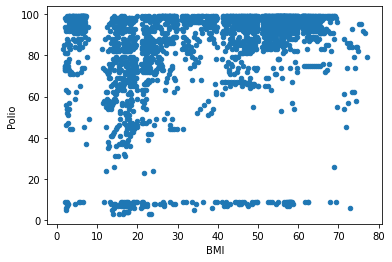

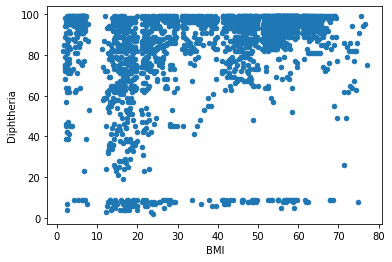

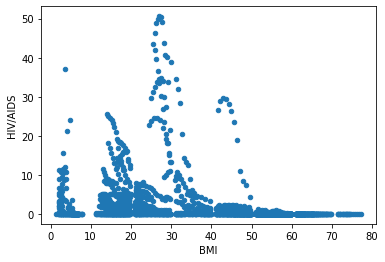

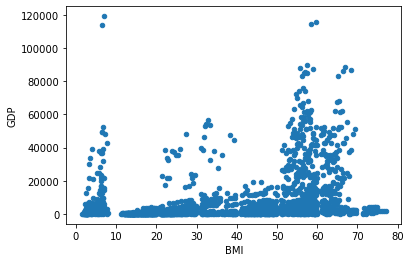

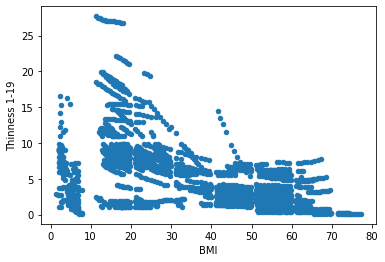

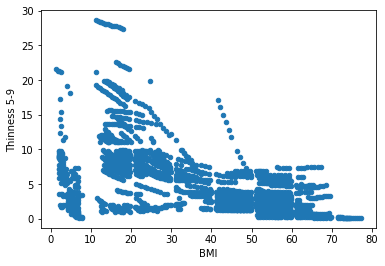

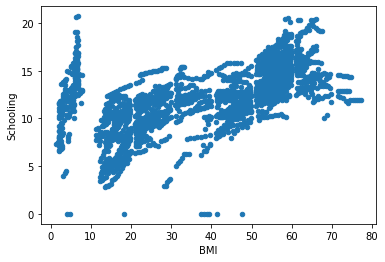

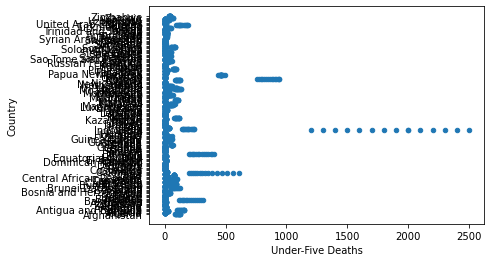

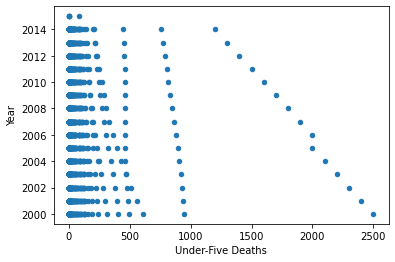

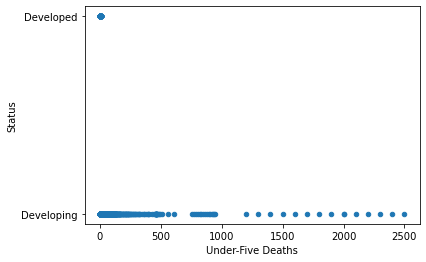

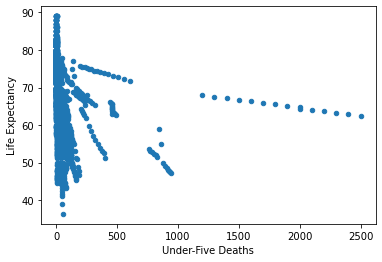

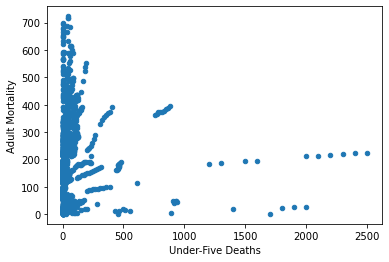

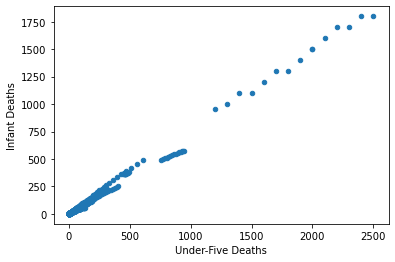

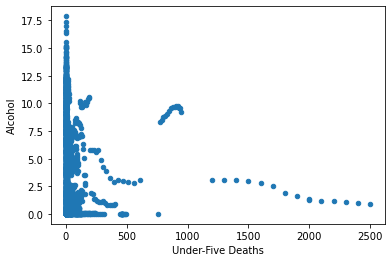

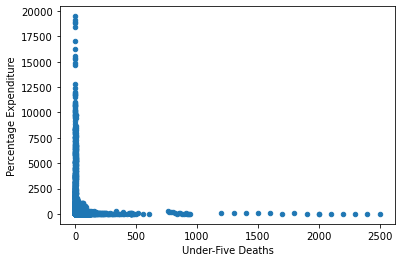

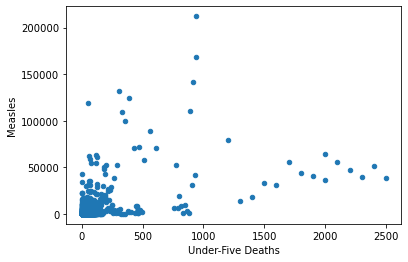

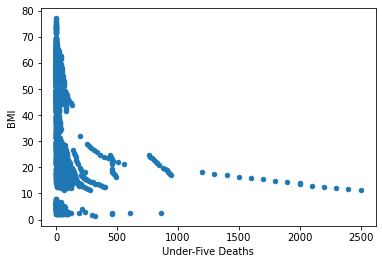

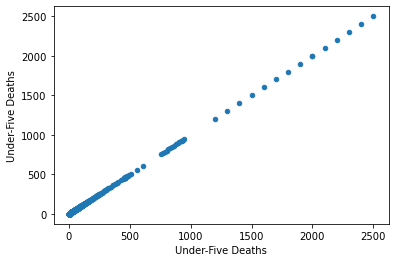

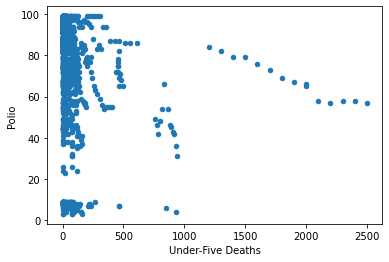

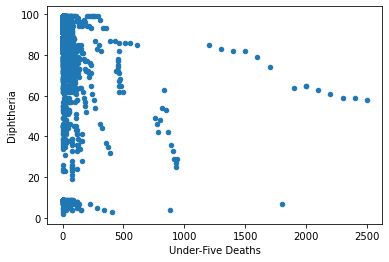

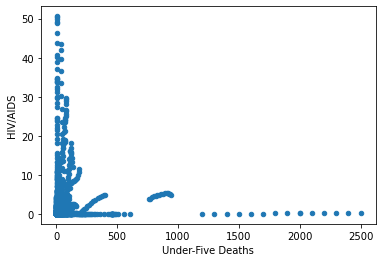

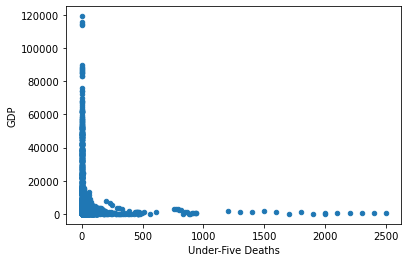

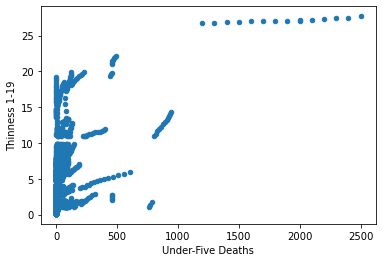

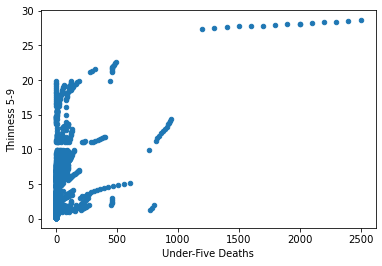

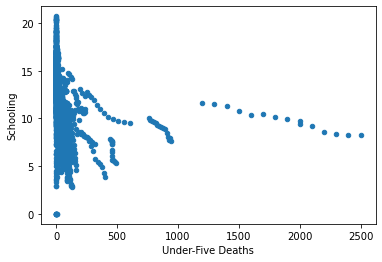

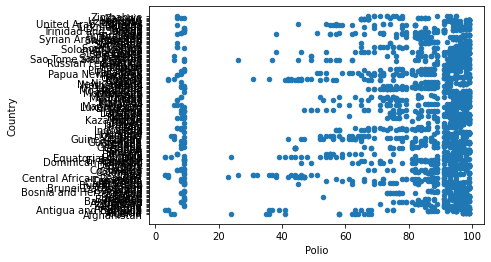

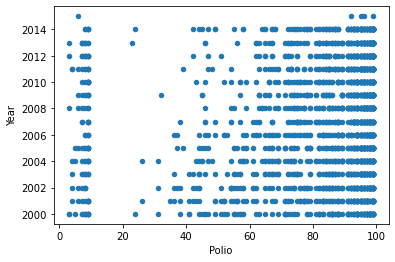

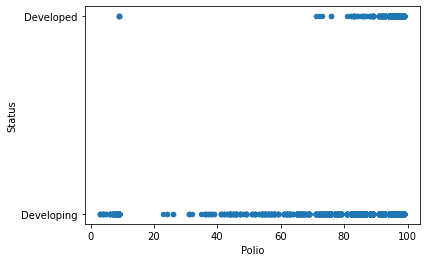

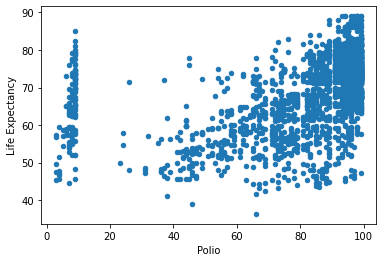

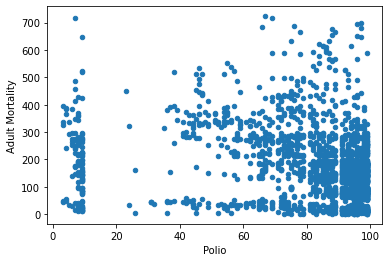

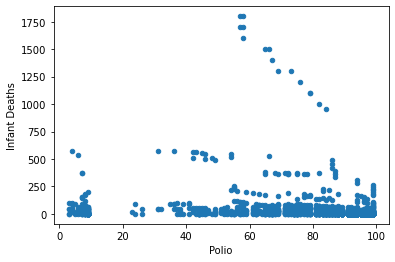

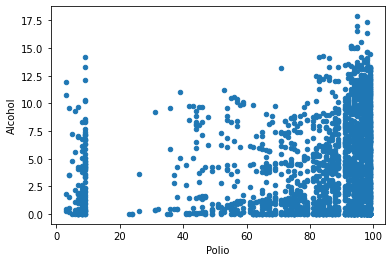

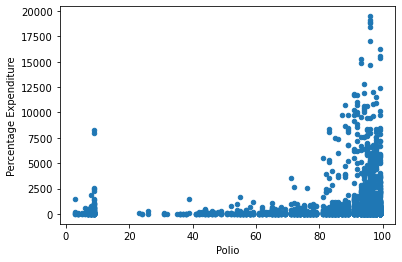

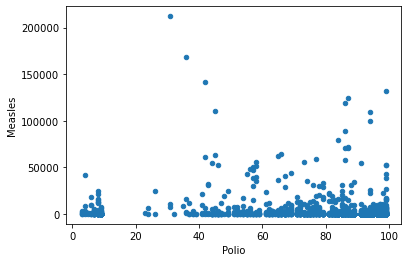

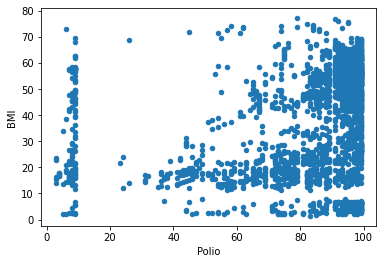

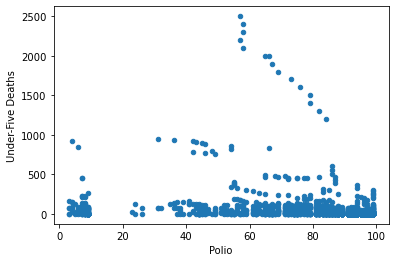

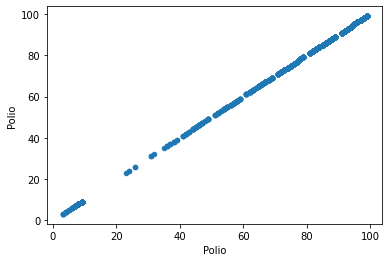

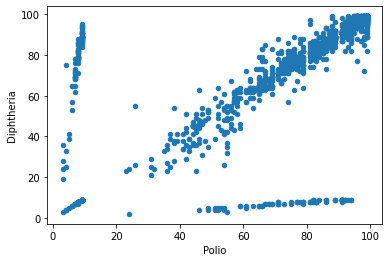

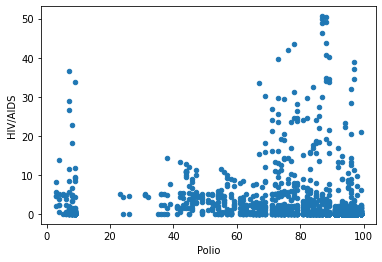

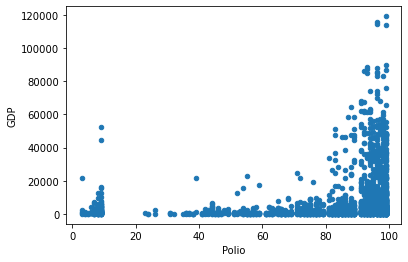

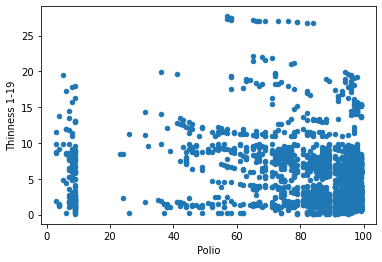

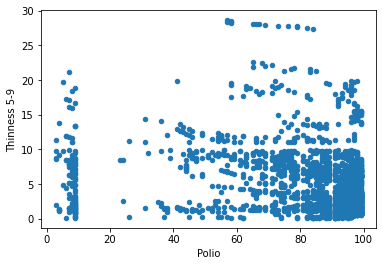

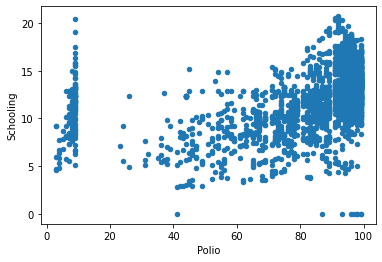

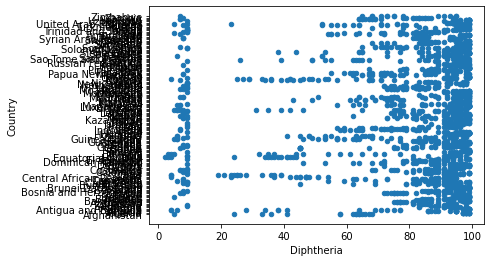

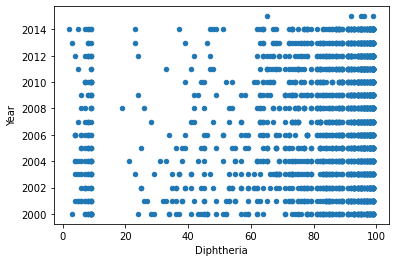

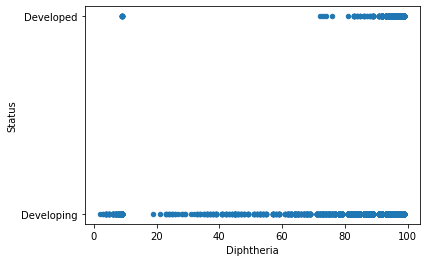

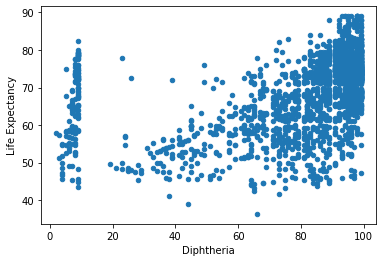

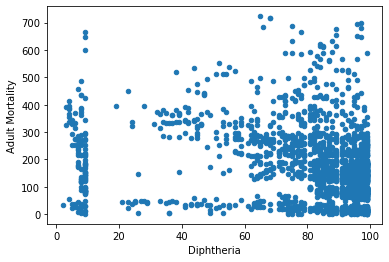

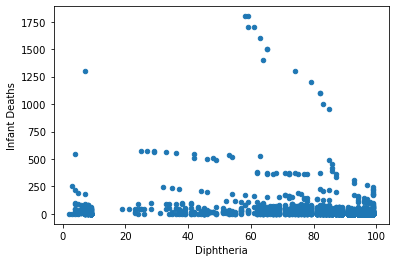

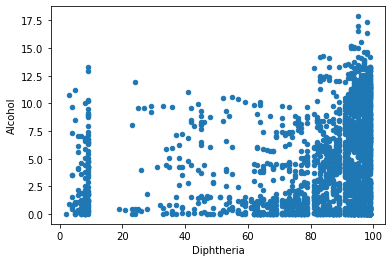

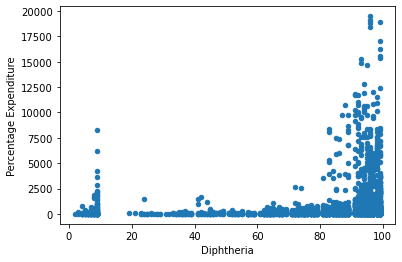

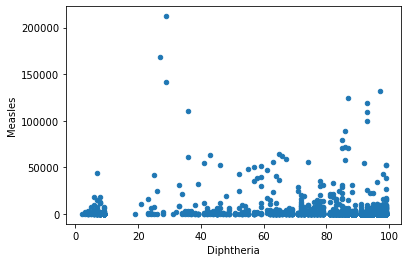

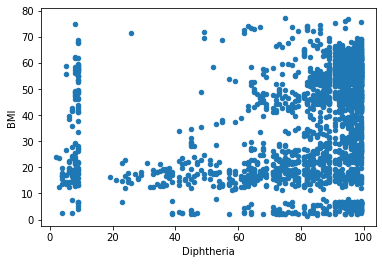

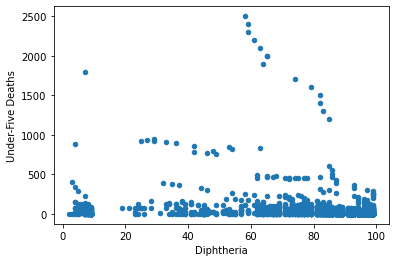

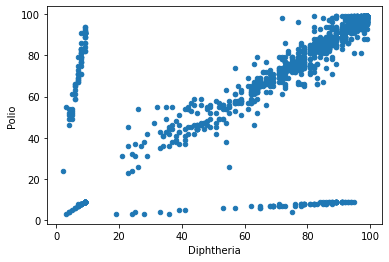

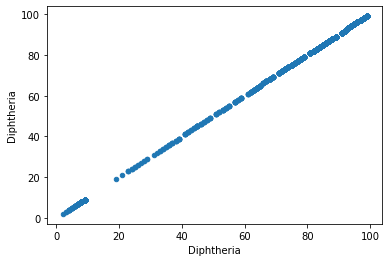

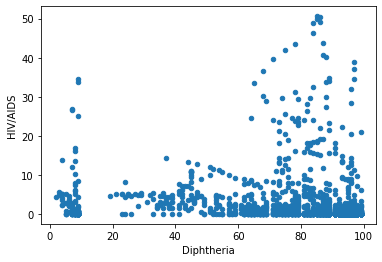

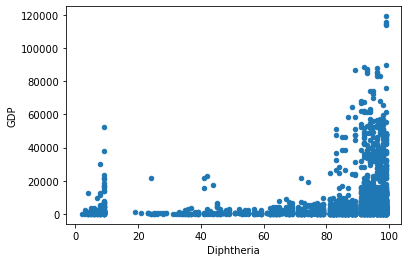

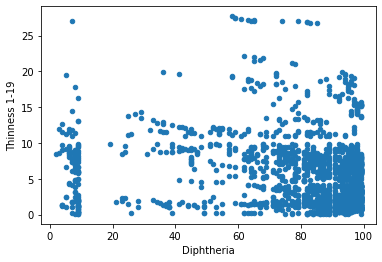

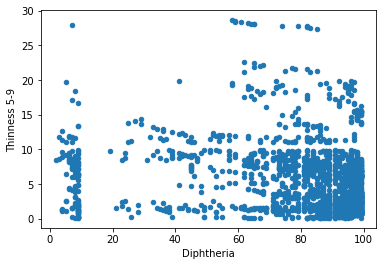

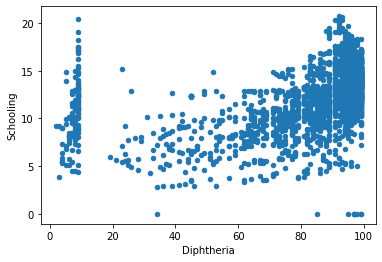

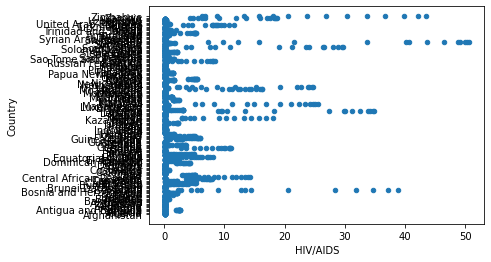

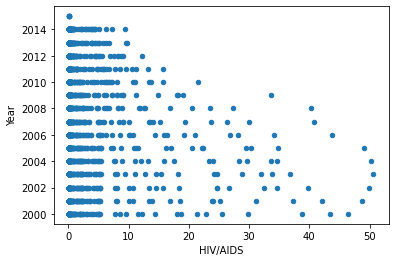

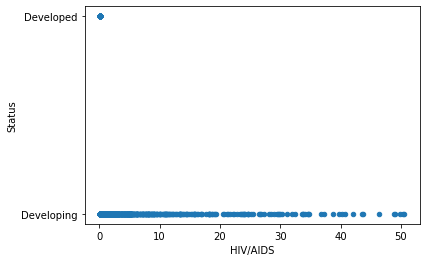

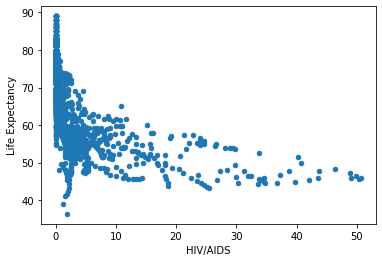

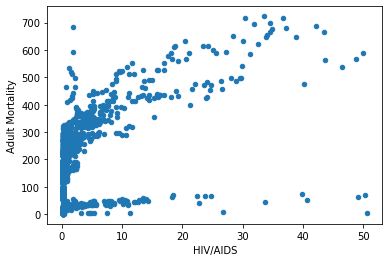

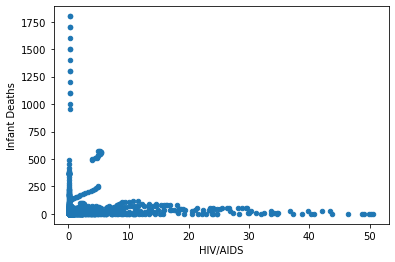

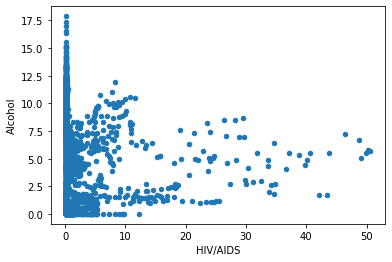

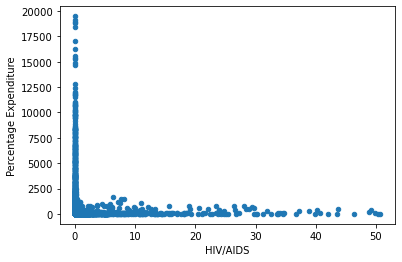

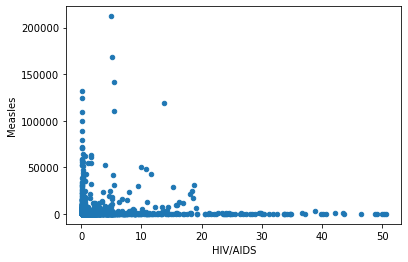

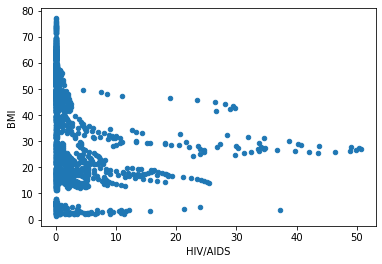

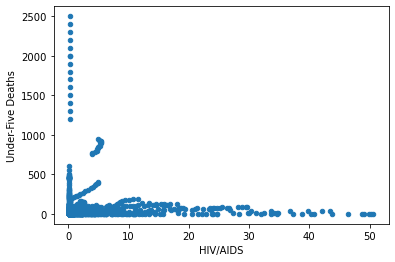

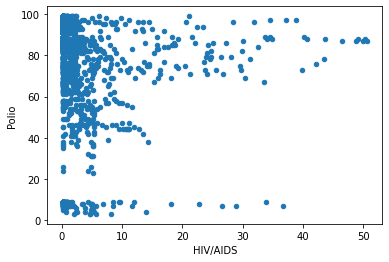

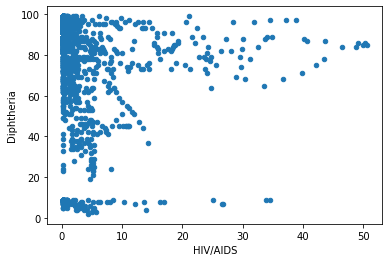

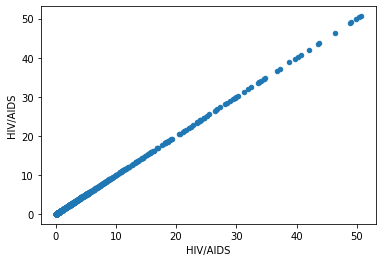

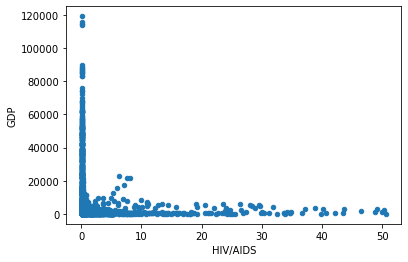

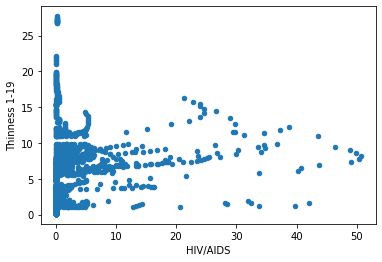

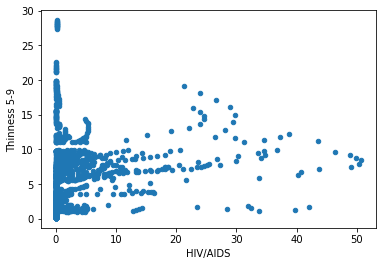

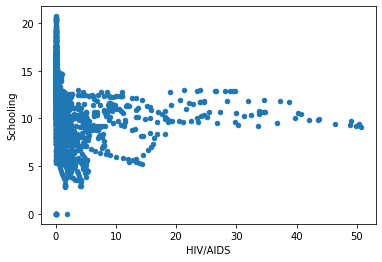

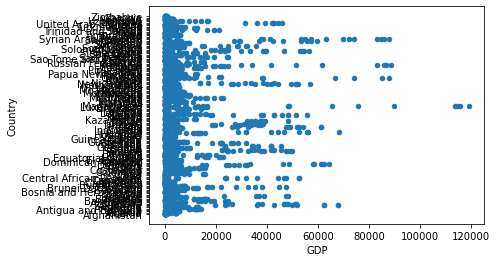

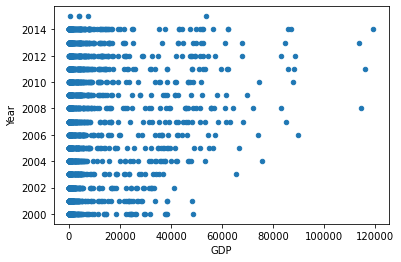

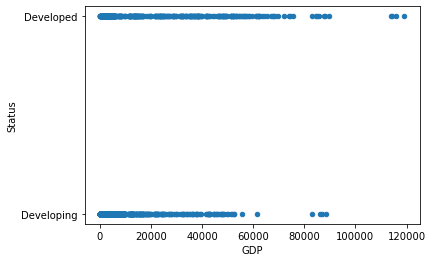

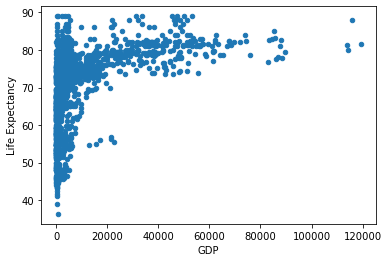

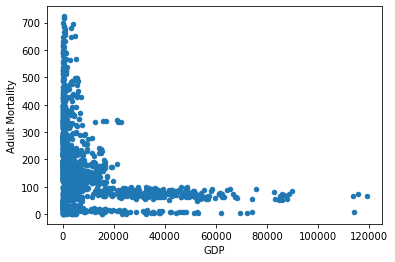

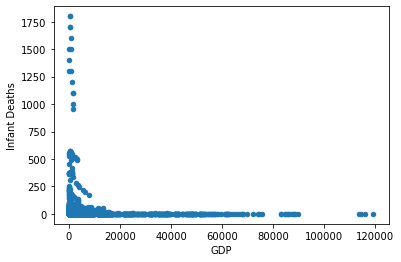

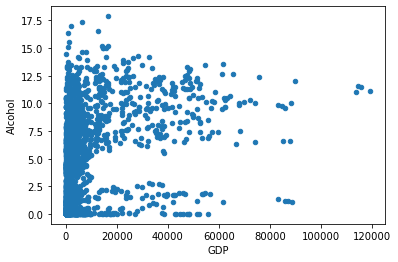

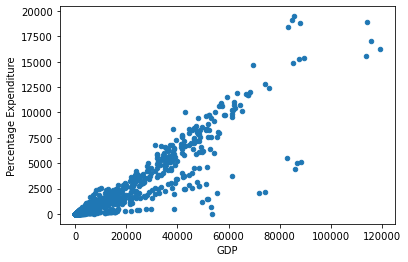

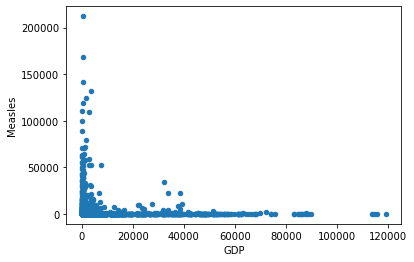

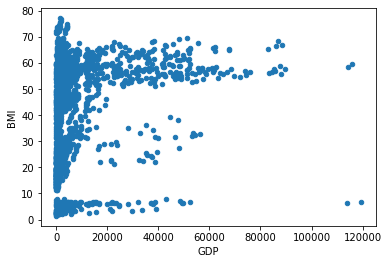

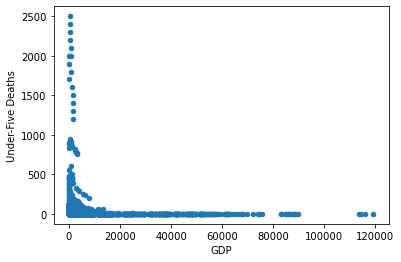

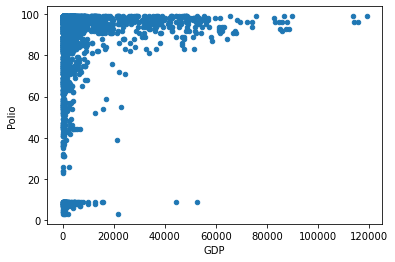

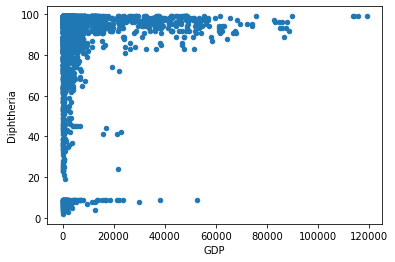

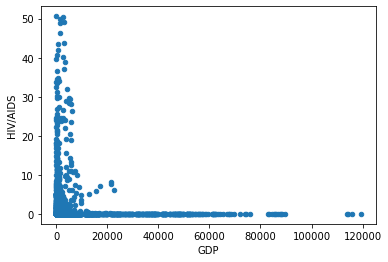

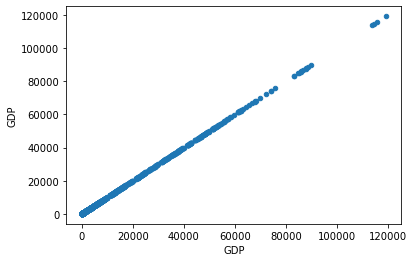

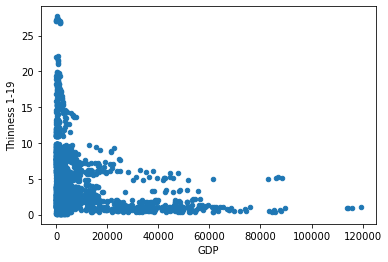

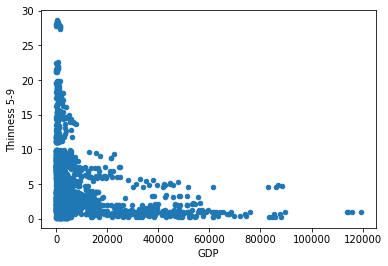

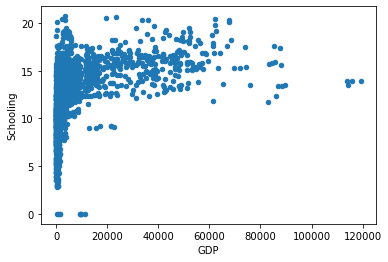

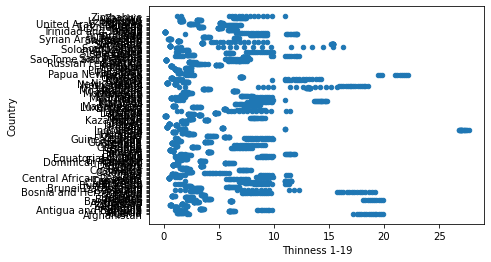

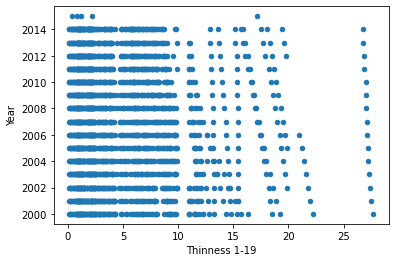

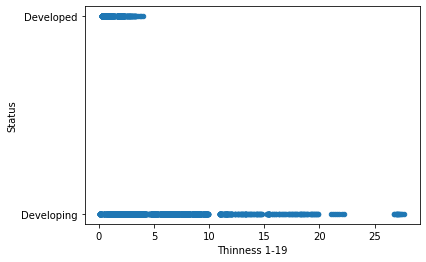

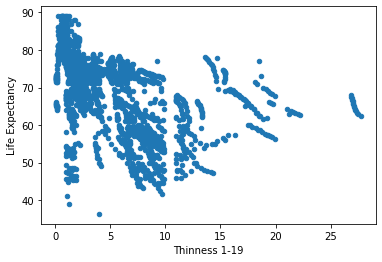

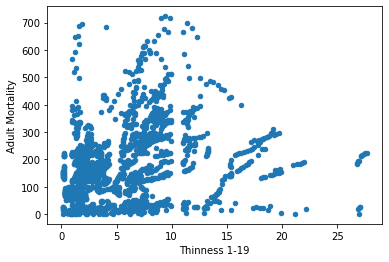

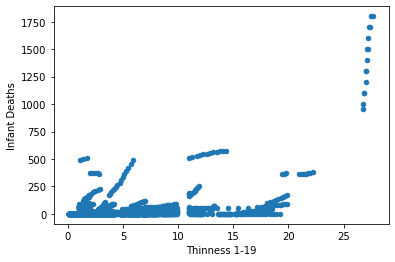

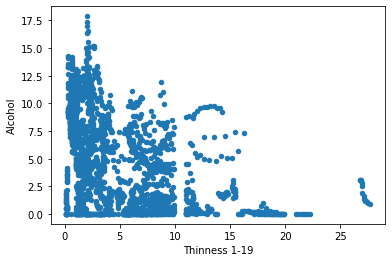

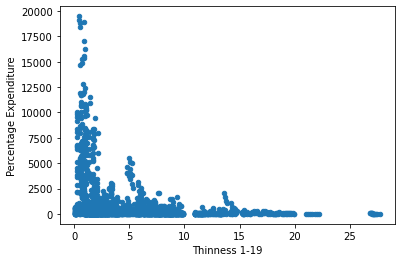

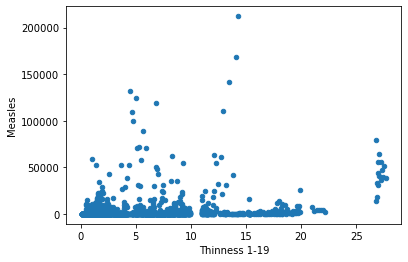

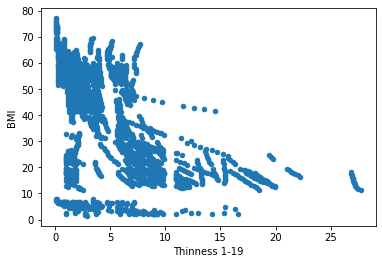

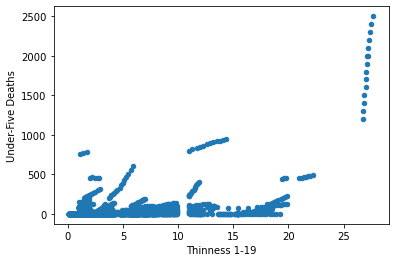

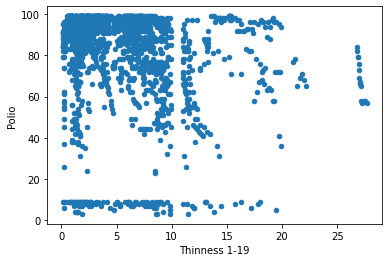

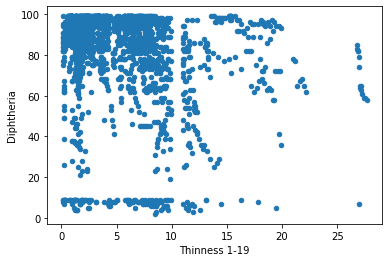

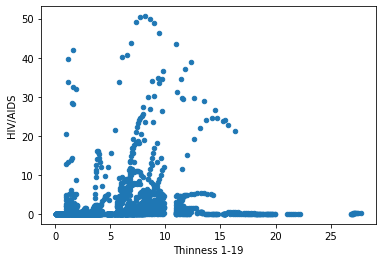

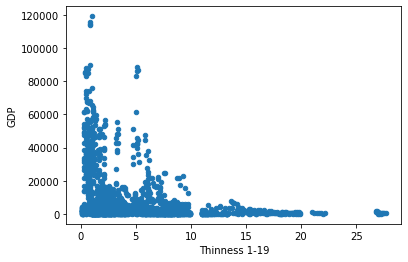

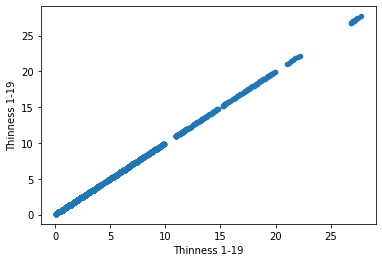

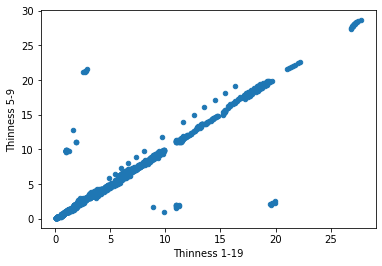

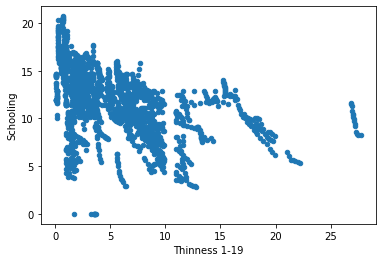

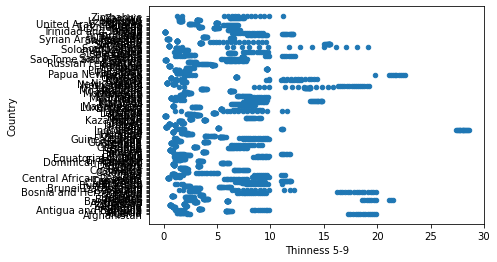

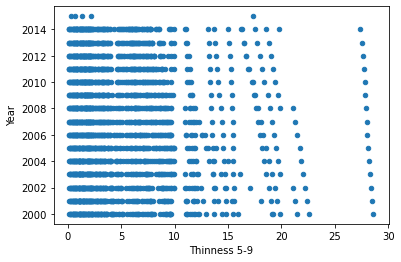

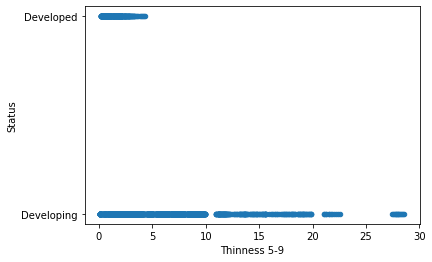

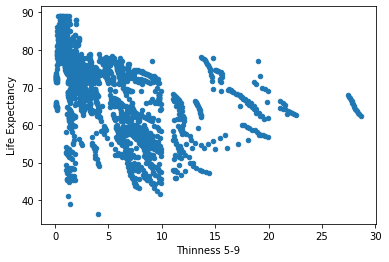

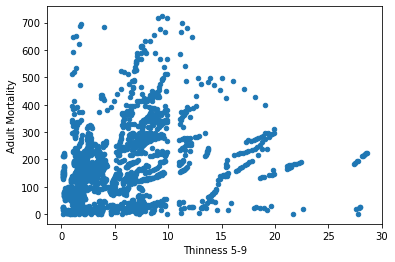

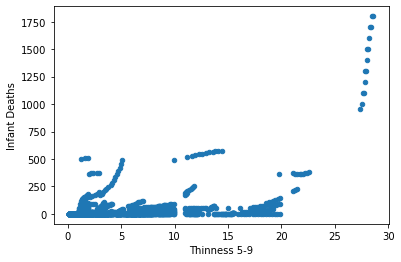

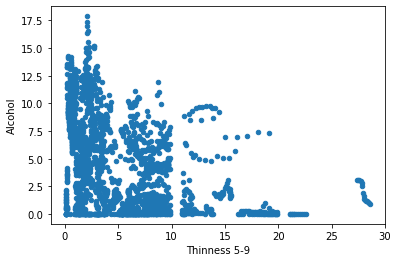

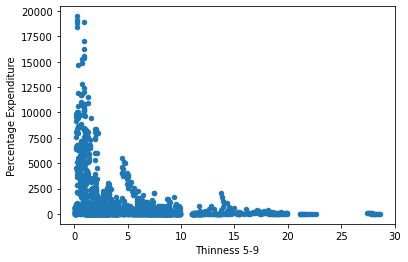

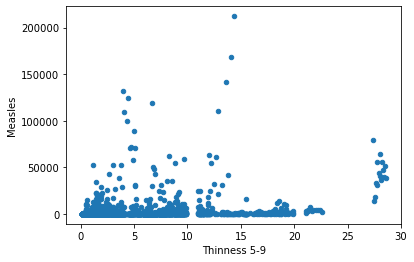

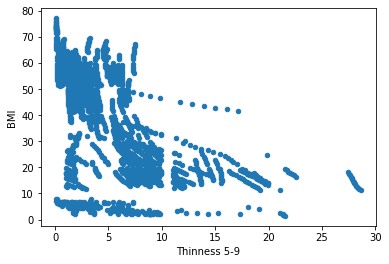

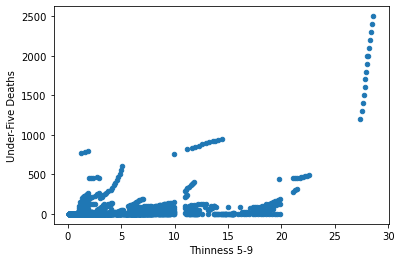

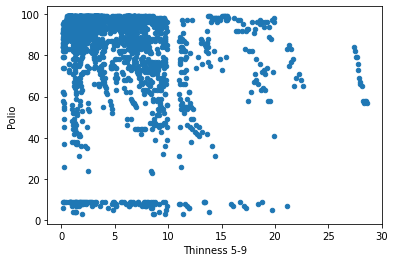

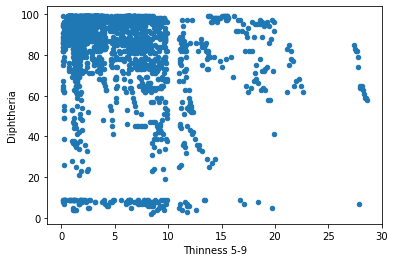

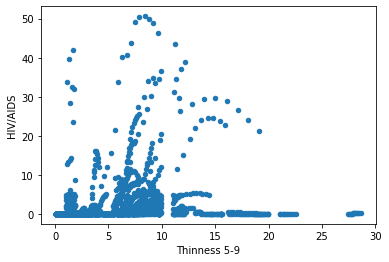

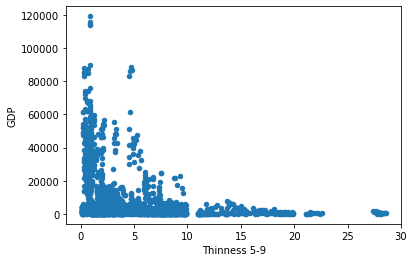

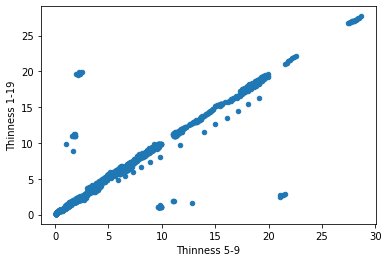

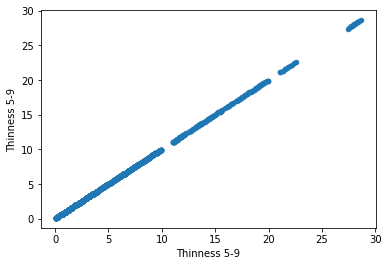

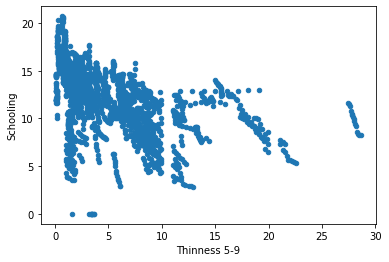

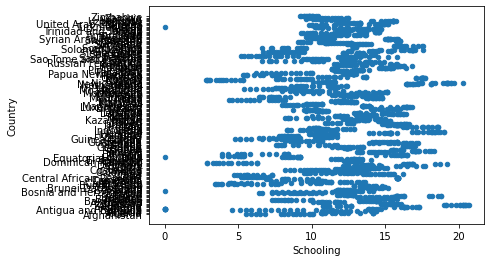

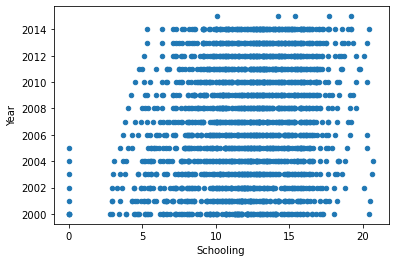

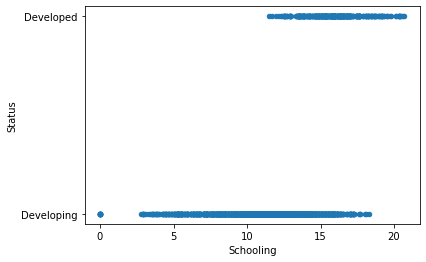

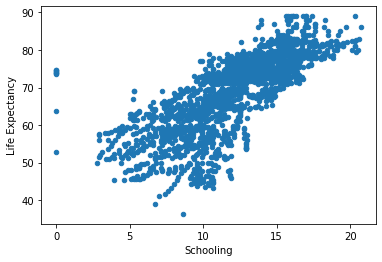

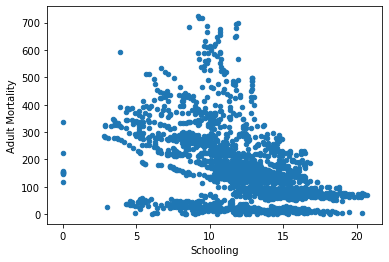

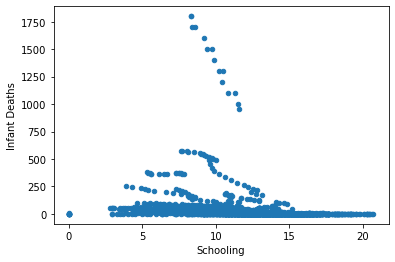

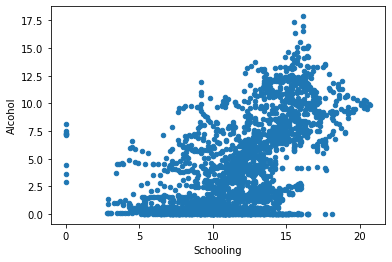

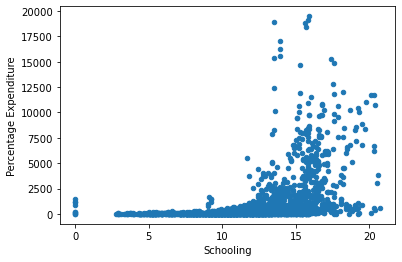

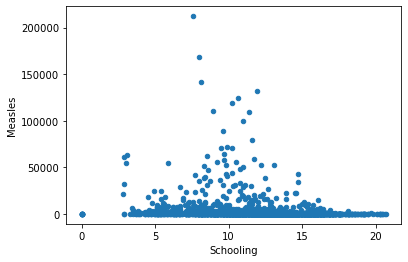

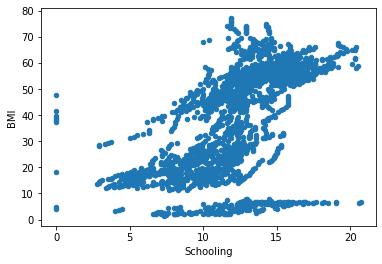

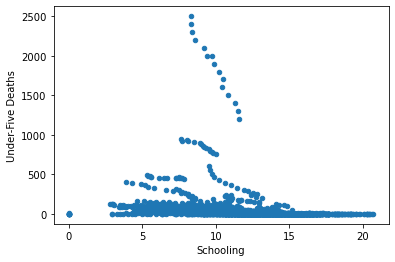

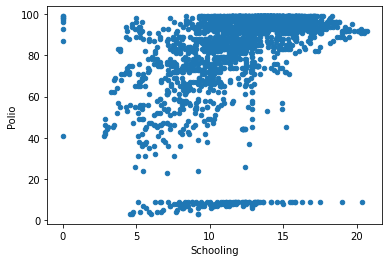

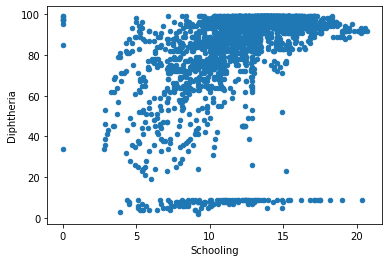

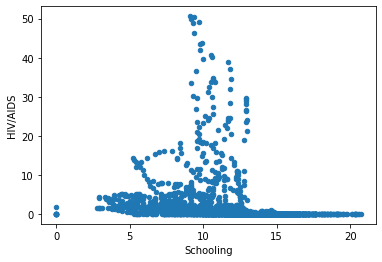

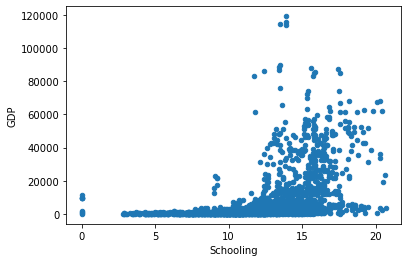

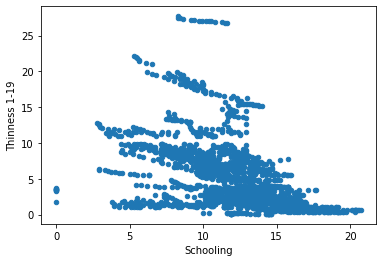

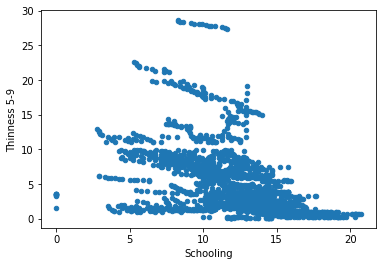

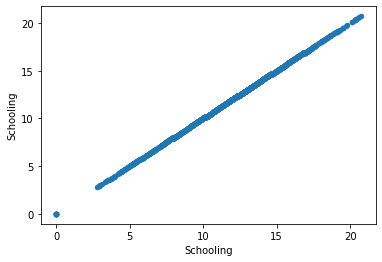

In [11]:
#viewing all possible graphics of data
for x in df:
    for y in df:
        df.plot(x,y,kind = "scatter")
        plt.show()

In [12]:
#dropping columns with low correlation to adult mortality
df = df.drop(['Measles','Infant Deaths','Under-Five Deaths'], axis=1)

#assigning target variables
x = df.drop('Life Expectancy', axis=1)
y = df['Life Expectancy']
x = pd.get_dummies(x, drop_first=True)

In [13]:
print(x)
print(y)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

      Year  Adult Mortality  Alcohol  Percentage Expenditure   BMI  Polio  \
0     2015            263.0     0.01               71.279624  19.1    6.0   
1     2014            271.0     0.01               73.523582  18.6   58.0   
2     2013            268.0     0.01               73.219243  18.1   62.0   
3     2012            272.0     0.01               78.184215  17.6   67.0   
4     2011            275.0     0.01                7.097109  17.2   68.0   
...    ...              ...      ...                     ...   ...    ...   
2933  2004            723.0     4.36                0.000000  27.1   67.0   
2934  2003            715.0     4.06                0.000000  26.7    7.0   
2935  2002             73.0     4.43                0.000000  26.3   73.0   
2936  2001            686.0     1.72                0.000000  25.9   76.0   
2937  2000            665.0     1.68                0.000000  25.5   78.0   

      Diphtheria  HIV/AIDS         GDP  Thinness 1-19  ...  \
0           6

In [14]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [15]:
y_pred = regressor.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('R2 Score:', r2)

Mean Absolute Error: 1.1419161589028113
Mean Squared Error: 3.1155105162940737
R2 Score: 0.9682559002366918


Text(0, 0.5, 'Predicted')

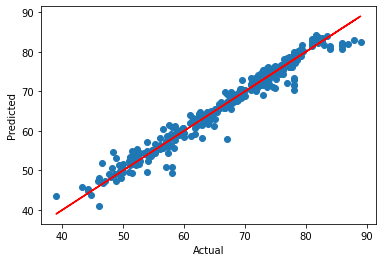

In [16]:
#Plotting the Prediction
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')

VISUALISATIONS
Some with some interesting correlations

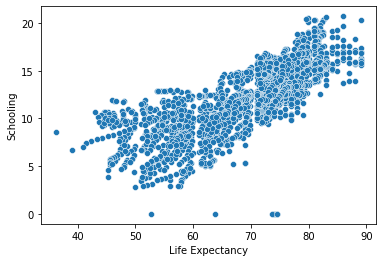

In [17]:
ax = sns.scatterplot(x="Life Expectancy", y="Schooling", data=df)
#an interesting trend with life expectancy and schooling.

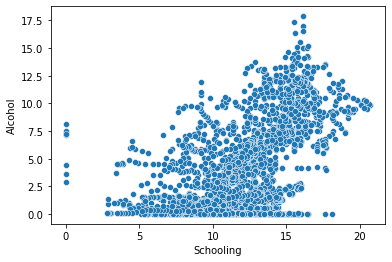

In [18]:
ax = sns.scatterplot(x="Schooling", y="Alcohol", data=df)
#the more school you would have, the more you would drink. 